In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import subprocess

import os

In [20]:
# Date range
file_name_date = '20221231'
start_date = pd.Timestamp('2020-01-22')
seir_start_date = pd.Timestamp('2021-07-01')
pre_date = pd.Timestamp('2021-10-07') # 예측 시작날짜
end_date = pd.Timestamp('2023-12-31')
# train_date = pd.date_range(start_date,pre_date-timedelta(days=1))
train_date = pd.date_range(start_date,pre_date)

predict_date = pd.date_range(pre_date,end_date) # 예측 날짜 범위
date = pd.date_range(seir_start_date,end_date)

In [3]:
result3 = pd.read_csv("C:/Users/user/Downloads/1025_true_result3.csv")
result4 = pd.read_csv("C:/Users/user/Downloads/1025_true_result4.csv")
result5 = pd.read_csv("C:/Users/user/Downloads/1025_true_result5.csv")

result3

,Unnamed: 0,time,U1,U2,U3,U4,V1,V2,V3,V4,...,V3.incidence,V4.incidence,V.incidence,V_cum,case,RT_,NPID,NPI,VACCINE_,TEST_
0,1,1,8.796616e+06,1.272598e+07,1.565429e+07,4.471542e+06,7.240000e+02,1.257656e+06,1.360168e+06,7.290718e+06,...,1000.0,4000.0,5000.0,5.000000e+03,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
1,2,2,8.782313e+06,1.265117e+07,1.555436e+07,4.431066e+06,1.458900e+04,1.331889e+06,1.459458e+06,7.331003e+06,...,99290.0,40285.0,227673.0,2.326730e+05,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
2,3,3,8.767972e+06,1.257631e+07,1.545438e+07,4.390577e+06,2.845400e+04,1.406122e+06,1.558748e+06,7.371288e+06,...,99290.0,40285.0,227673.0,4.603460e+05,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
3,4,4,8.753600e+06,1.250141e+07,1.535436e+07,4.350081e+06,4.231900e+04,1.480355e+06,1.658038e+06,7.411573e+06,...,99290.0,40285.0,227673.0,6.880190e+05,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
4,5,5,8.739204e+06,1.242649e+07,1.525432e+07,4.309581e+06,5.618400e+04,1.554588e+06,1.757328e+06,7.451858e+06,...,99290.0,40285.0,227673.0,9.156920e+05,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,910,910,1.291059e+06,1.147404e+05,1.252275e+05,4.937172e+04,6.059729e+06,1.369911e+07,1.675012e+07,1.167373e+07,...,0.0,0.0,0.0,3.827841e+07,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
910,911,911,1.291054e+06,1.147400e+05,1.252272e+05,4.937161e+04,6.059729e+06,1.369911e+07,1.675012e+07,1.167373e+07,...,0.0,0.0,0.0,3.827841e+07,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
911,912,912,1.291048e+06,1.147397e+05,1.252270e+05,4.937151e+04,6.059729e+06,1.369911e+07,1.675012e+07,1.167373e+07,...,0.0,0.0,0.0,3.827841e+07,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1
912,913,913,1.291043e+06,1.147394e+05,1.252267e+05,4.937141e+04,6.059729e+06,1.369911e+07,1.675012e+07,1.167373e+07,...,0.0,0.0,0.0,3.827841e+07,RT 4 NPID 300 NPI1 0.8 VACCINE_ 1 TEST_ 1,4,300,0.8,1,1


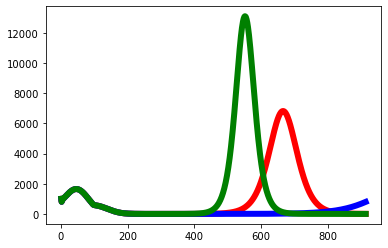

In [16]:
plt.plot(result3['time'], result3['TP.incidence'],color = 'r',  linewidth = 6)
plt.plot(result4['time'], result4['TP.incidence'],color = 'b',  linewidth = 6)
plt.plot(result5['time'], result5['TP.incidence'],color = 'g',  linewidth = 6)

plt.show()

In [21]:
all_seir_date = int(str(end_date-seir_start_date)[:3])+1
all_seir_date

914

In [22]:
# Option
rt = [3.5, 4, 4.5]
npi = [0.85, 1]
# npi2 = [0.85, 1]
vac = [0.8, 1, 1.2]
test = [0.95, 1, 1.2]

In [23]:
path_1 = '../../../04_result/SEIR/1026hey.csv'
path_2 = '../../../01_data/국제/수집데이터_211006.xlsx'
path_3 = '../../../04_result/SEIR/owid-covid-data.csv'

In [24]:
data_case= pd.read_excel(path_2, date_format='%Y-%m-%d',engine = "openpyxl",sheet_name ='확진자,사망자수(US 제외)' )
data_case=data_case[data_case['Country'] =='South Korea']
#df_= df_1_2.drop(['Province1','Province2','Unnamed: 6'], axis=1, inplace=True)
data_case.drop(['Province1','Province2'], axis=1, inplace=True)
data_case

,tDate,Country,Confirmed,Deaths
38,2020-01-22,South Korea,0.0,0.0
86,2020-01-23,South Korea,0.0,0.0
130,2020-01-24,South Korea,1.0,0.0
177,2020-01-25,South Korea,0.0,0.0
225,2020-01-26,South Korea,1.0,0.0
...,...,...,...,...
364094,2021-09-30,South Korea,2564.0,7.0
364817,2021-10-01,South Korea,2484.0,16.0
365540,2021-10-02,South Korea,2247.0,7.0
366263,2021-10-04,South Korea,3757.0,9.0


In [25]:
## 과거 확진자, 사망자

old_data= data_case[ data_case['tDate'].isin(train_date) ] #Confirmed, Deaths
old_data = old_data.fillna(0)
old_data

,tDate,Country,Confirmed,Deaths
38,2020-01-22,South Korea,0.0,0.0
86,2020-01-23,South Korea,0.0,0.0
130,2020-01-24,South Korea,1.0,0.0
177,2020-01-25,South Korea,0.0,0.0
225,2020-01-26,South Korea,1.0,0.0
...,...,...,...,...
364094,2021-09-30,South Korea,2564.0,7.0
364817,2021-10-01,South Korea,2484.0,16.0
365540,2021-10-02,South Korea,2247.0,7.0
366263,2021-10-04,South Korea,3757.0,9.0


In [26]:
#일별 중증자 수 - severity
old_severity= pd.read_excel(path_2, date_format='%Y-%m-%d',engine = "openpyxl",usecols='A,H',sheet_name ='확진자 관리현황')
old_severity.columns = ['tDate','Severity']


old_severity= old_severity[old_severity['tDate'].isin(train_date) ] #Confirmed, Deaths
s_date_range = pd.date_range(old_severity.iloc[0,0],old_severity.iloc[-1,0])

old_severity = old_severity.fillna(0)
old_severity

,tDate,Severity
0,2020-10-26,53
1,2020-10-27,52
2,2020-10-28,52
3,2020-10-29,53
4,2020-10-30,51
...,...,...
275,2021-07-28,286
276,2021-07-29,285
277,2021-07-30,299
278,2021-07-31,317


In [27]:
tp_data = pd.read_csv(path_1)
tp_data

,Unnamed: 0,time,U1,U2,U3,U4,V1,V2,V3,V4,...,V3.incidence,V4.incidence,V.incidence,V_cum,case,RT,NPID,NPI,VACCINE_,TEST_
0,1,1,8.796616e+06,1.272598e+07,1.565429e+07,4.471542e+06,7.240000e+02,1.257656e+06,1.360168e+06,7.290718e+06,...,1000.0,4000.0,5000.0,5.000000e+03,RT_ 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ ...,3.5,300,0.85,0.8,0.95
1,2,2,8.782313e+06,1.265117e+07,1.555436e+07,4.431066e+06,1.458900e+04,1.331889e+06,1.459458e+06,7.331003e+06,...,99290.0,40285.0,227673.0,2.326730e+05,RT_ 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ ...,3.5,300,0.85,0.8,0.95
2,3,3,8.767972e+06,1.257631e+07,1.545438e+07,4.390577e+06,2.845400e+04,1.406122e+06,1.558748e+06,7.371288e+06,...,99290.0,40285.0,227673.0,4.603460e+05,RT_ 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ ...,3.5,300,0.85,0.8,0.95
3,4,4,8.753600e+06,1.250141e+07,1.535436e+07,4.350081e+06,4.231900e+04,1.480355e+06,1.658038e+06,7.411573e+06,...,99290.0,40285.0,227673.0,6.880190e+05,RT_ 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ ...,3.5,300,0.85,0.8,0.95
4,5,5,8.739204e+06,1.242649e+07,1.525432e+07,4.309581e+06,5.618400e+04,1.554588e+06,1.757328e+06,7.451858e+06,...,99290.0,40285.0,227673.0,9.156920e+05,RT_ 3.5 NPID 300 NPI1 0.85 VACCINE_ 0.8 TEST_ ...,3.5,300,0.85,0.8,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74029,74030,910,1.669318e+06,-8.891902e+05,-1.016577e+06,-4.061065e+04,7.008095e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT_ 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,4.5,300,1.00,1.2,1.20
74030,74031,911,1.669318e+06,-8.891902e+05,-1.016577e+06,-4.061065e+04,7.008095e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT_ 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,4.5,300,1.00,1.2,1.20
74031,74032,912,1.669318e+06,-8.891902e+05,-1.016577e+06,-4.061065e+04,7.008095e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT_ 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,4.5,300,1.00,1.2,1.20
74032,74033,913,1.669318e+06,-8.891902e+05,-1.016577e+06,-4.061065e+04,7.008095e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT_ 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,4.5,300,1.00,1.2,1.20


In [28]:
len(tp_data)

74034

In [29]:
_data = pd.read_csv(path_3)

_data=_data[_data['location'] =='South Korea']
_data['date'] = pd.to_datetime(_data['date'], format="%Y-%m-%d")
_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
102729,KOR,Asia,South Korea,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
102730,KOR,Asia,South Korea,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
102731,KOR,Asia,South Korea,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
102732,KOR,Asia,South Korea,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
102733,KOR,Asia,South Korea,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103354,KOR,Asia,South Korea,2021-10-07,327976.0,2172.0,2029.000,2554.0,10.0,8.143,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
103355,KOR,Asia,South Korea,2021-10-08,329925.0,1949.0,1986.429,2560.0,6.0,8.000,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
103356,KOR,Asia,South Korea,2021-10-09,331519.0,1594.0,1916.286,2575.0,15.0,9.714,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
103357,KOR,Asia,South Korea,2021-10-10,332816.0,1297.0,1862.714,2583.0,8.0,10.000,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN


In [30]:
_data['new_cases']

102729       NaN
102730       NaN
102731       0.0
102732       1.0
102733       0.0
           ...  
103354    2172.0
103355    1949.0
103356    1594.0
103357    1297.0
103358    1347.0
Name: new_cases, Length: 630, dtype: float64

In [54]:
def TP_Plot(y,folder_name,file_name,option,y_lim):

    ################스타일#######################################
    fig = plt.figure(figsize=(40,15)) ## 캔버스 생성
    fig.patch.set_facecolor('#050636') 
    plt.rcParams['text.color'] = 'w'
    plt.rcParams['xtick.color'] = 'w'
    plt.rcParams['ytick.color'] = 'w'
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.facecolor']='#050636'
    plt.grid(color='w', linestyle='-', linewidth=3,alpha = 0.5)
    plt.gca().spines['bottom'].set_visible(True) #위 테두리
    plt.gca().spines['left'].set_visible(True) #왼쪽 테두리
    #############################################################
   
    low_data = y[0:all_seir_date]
    low_data['tDate'] = date
    
    base_data = y[all_seir_date:all_seir_date*2]
    base_data['tDate'] = date

    high_data = y[all_seir_date*2:all_seir_date*3]
    high_data['tDate'] = date

    plt.ylim(y_lim)

    ################ Ground Truth #######################################
#     plt.plot(old_data['tDate'], old_data['Confirmed'],color = 'w',  linewidth = 6)  ## 이유엔 데이터
#     plt.plot(train_date, low_data.loc[(low_data['tDate']>=start_date)&(low_data['tDate']<=pre_date),'TP.incidence'],color = 'w',  linewidth = 6)

#     plt.plot(train_data['tDate'], train_data['Confirmed'],'o',color = 'w',alpha = 0.3)
    plt.plot(train_date, _data.loc[_data['date'].isin(train_date),'new_cases'],color = '#2dcafd',  linewidth = 6)

    
#     ################ Estimate #######################################
#     plt.plot(train_data['tDate'], base_data.loc[(base_data['tDate']>=start_date)&(base_data['tDate']<=pre_date),'TP.incidence'],color = '#2dcafd', linewidth = 8)

#     plt.fill_between(train_data['tDate'],base_data.loc[(base_data['tDate']>=start_date)&(base_data['tDate']<=pre_date),'TP.incidence']-300, 
#                     base_data.loc[(base_data['tDate']>=start_date)&(base_data['tDate']<=pre_date),'TP.incidence']+300, color = '#2dcafd',alpha=0.2)
    
    
    ################ Low Data #######################################
#     plt.plot(predict_date, low_data.loc[(low_data['tDate']>=pre_date)&(low_data['tDate']<=end_date),'TP.incidence'], color ='#09d0a2', linewidth = 8)
    plt.plot(date, low_data['TP.incidence'], color ='#09d0a2', linewidth = 8)

    plt.fill_between(predict_date, low_data.loc[(low_data['tDate']>=pre_date)&(low_data['tDate']<=end_date),'TP.incidence']-300, 
                    low_data.loc[(low_data['tDate']>=pre_date)&(low_data['tDate']<=end_date),'TP.incidence']+300, color = '#09d0a2',alpha=0.3)
    
    
    ################ Base Data #######################################
#     plt.plot(predict_date, base_data.loc[(base_data['tDate']>=pre_date)&(base_data['tDate']<=end_date),'TP.incidence'], color ='#f56be4', linewidth = 8)
    plt.plot(date, base_data['TP.incidence'], color ='#f56be4', linewidth = 8)

    plt.fill_between(predict_date,base_data.loc[(base_data['tDate']>=pre_date)&(base_data['tDate']<=end_date),'TP.incidence']-300, 
                    base_data.loc[(base_data['tDate']>=pre_date)&(base_data['tDate']<=end_date),'TP.incidence']+300, color = '#f56be4',alpha=0.3)
    
    
    
    ################ High Data #######################################
#     plt.plot(predict_date, high_data.loc[(high_data['tDate']>=pre_date)&(high_data['tDate']<=end_date),'TP.incidence'], color ='#f68960', linewidth = 8)
    plt.plot(date, high_data['TP.incidence'], color ='#f68960', linewidth = 8)
 
    plt.fill_between(predict_date, high_data.loc[(high_data['tDate']>=pre_date)&(high_data['tDate']<=end_date),'TP.incidence']-300, 
                    high_data.loc[(high_data['tDate']>=pre_date)&(high_data['tDate']<=end_date),'TP.incidence']+300, color = '#f68960',alpha=0.3)
    
    
    
    
    
    ################ Legend #######################################
    plt.legend(['Ground-Truth(eun)',folder_name+' '+str(option[0]),folder_name+' '+str(option[1]),folder_name+' '+str(option[2])],fontsize=30,loc = 'upper left', edgecolor = 'w') #왜 이게 적용안되지?


    plt.axvline(x = pre_date,linestyle = ':',color='w',linewidth=8, alpha = 0.7)
    
    plt.title(file_name,fontsize=50)
#     plt.suptitle(file_name, y=1, fontsize=30)
    plt.xticks([old_data.iloc[0,0],pre_date,end_date],[str(old_data.iloc[0,0])[:10],str(pre_date)[:10],str(end_date)[:10]],fontsize=30)
    plt.yticks(fontsize = 30)
    plt.tight_layout()
#     plt.savefig("../../../07_plot/MA/SEIR/I/"+file_name+".png",dpi=300)
    plt.savefig("../../../04_result/SEIR/test_1026/"+file_name+".png",dpi=300)
    plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

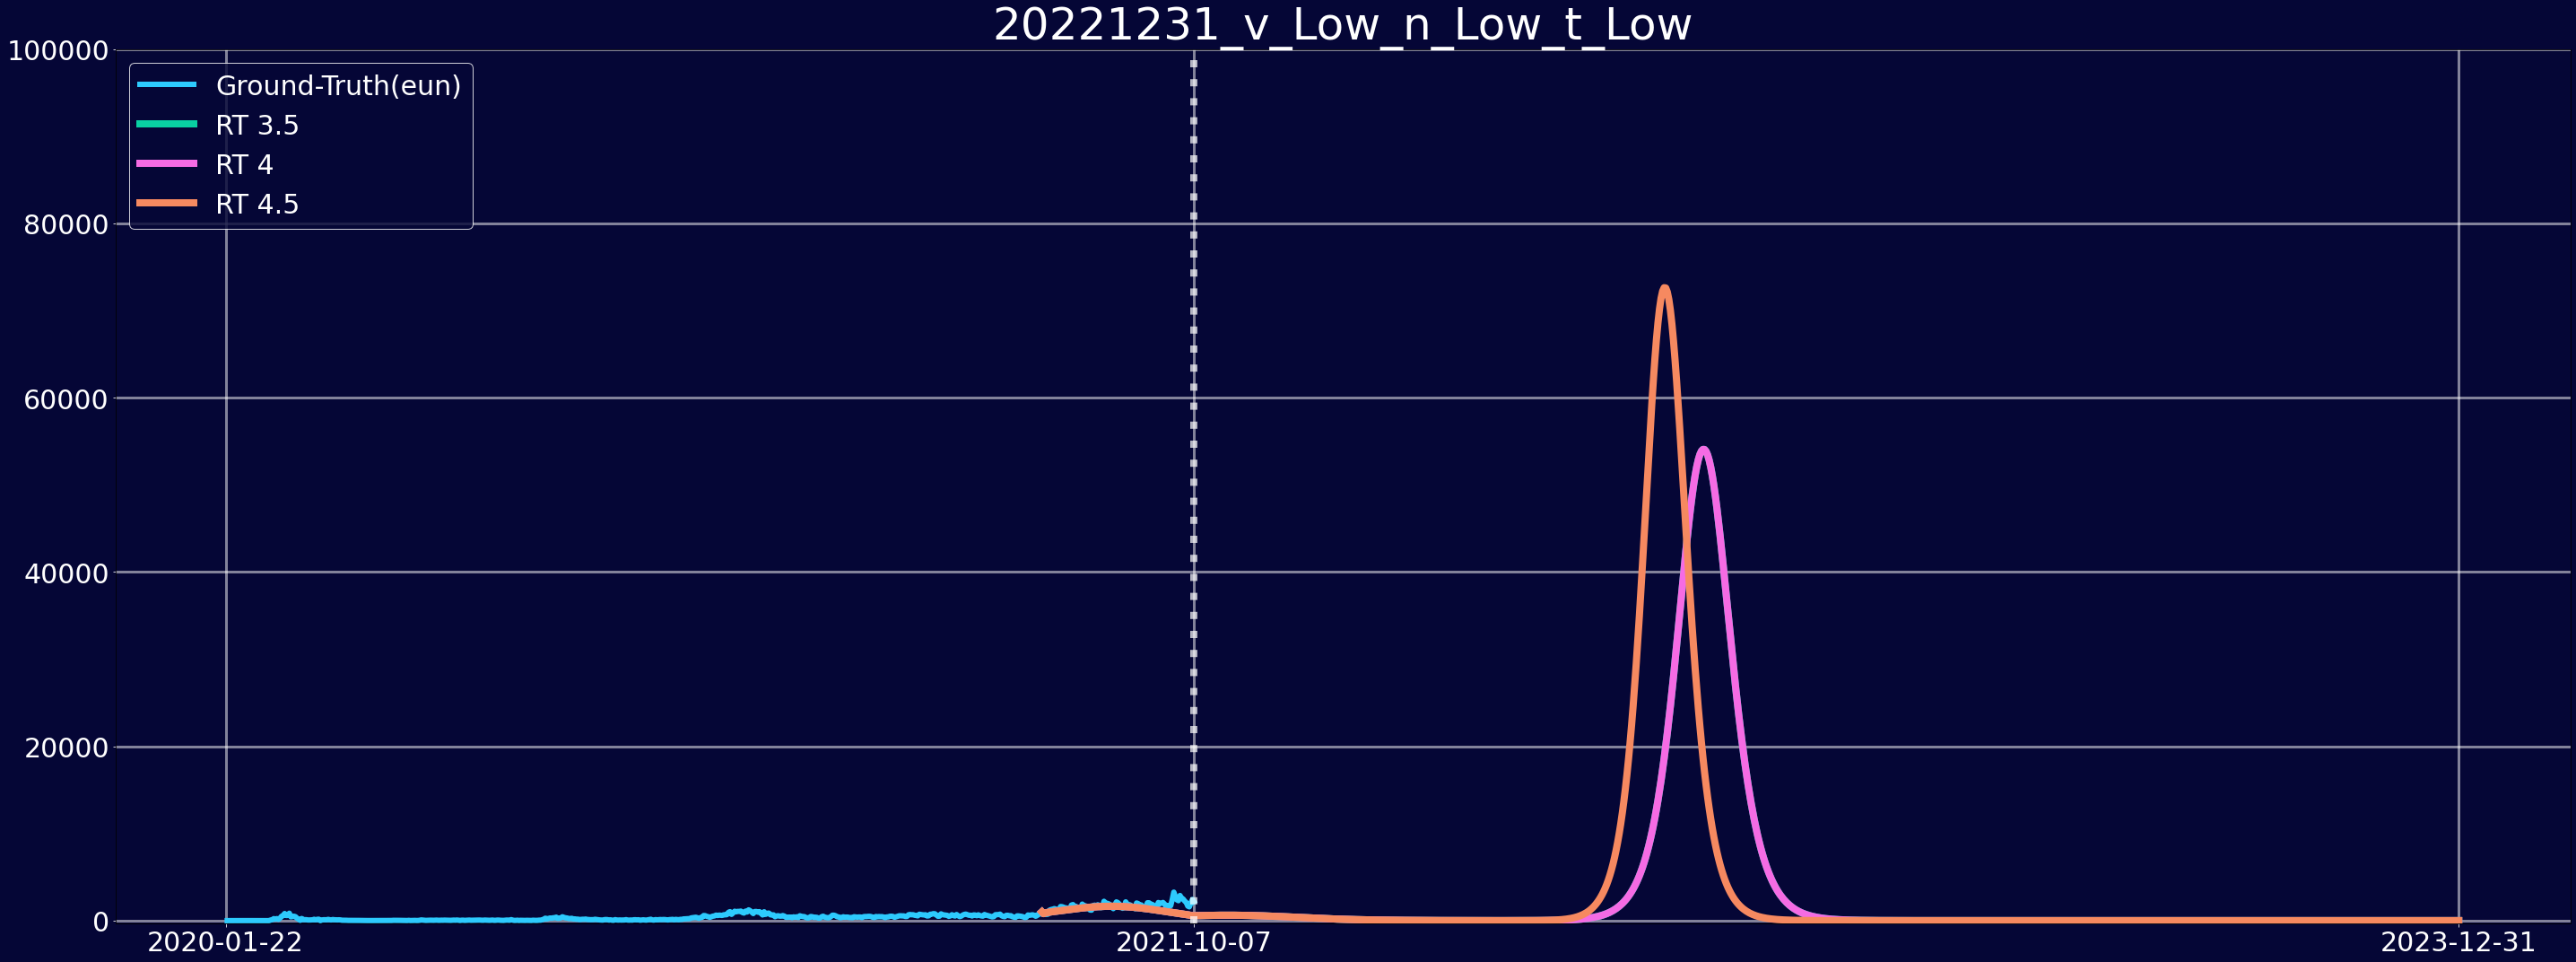

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

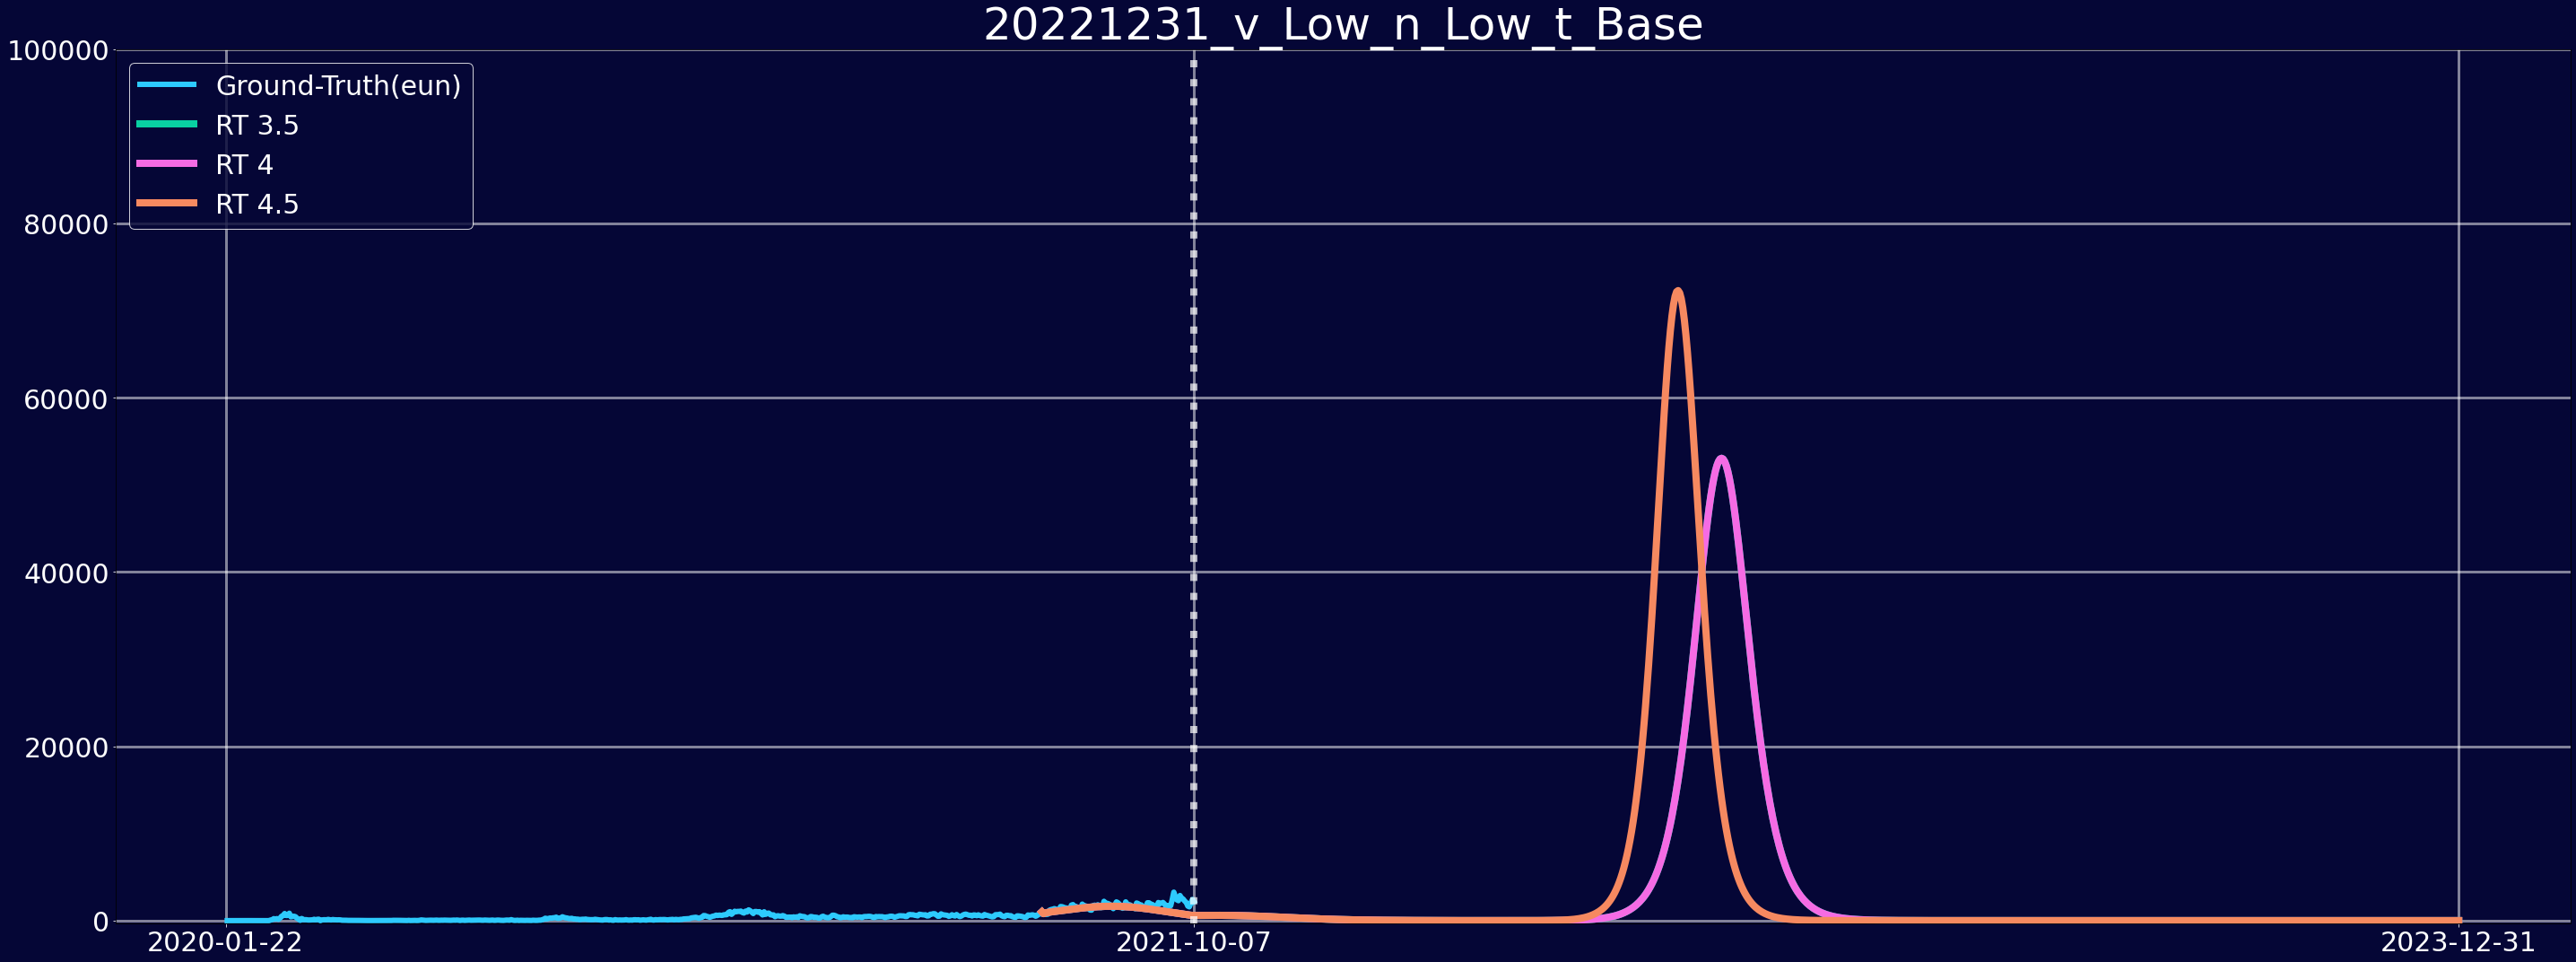

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

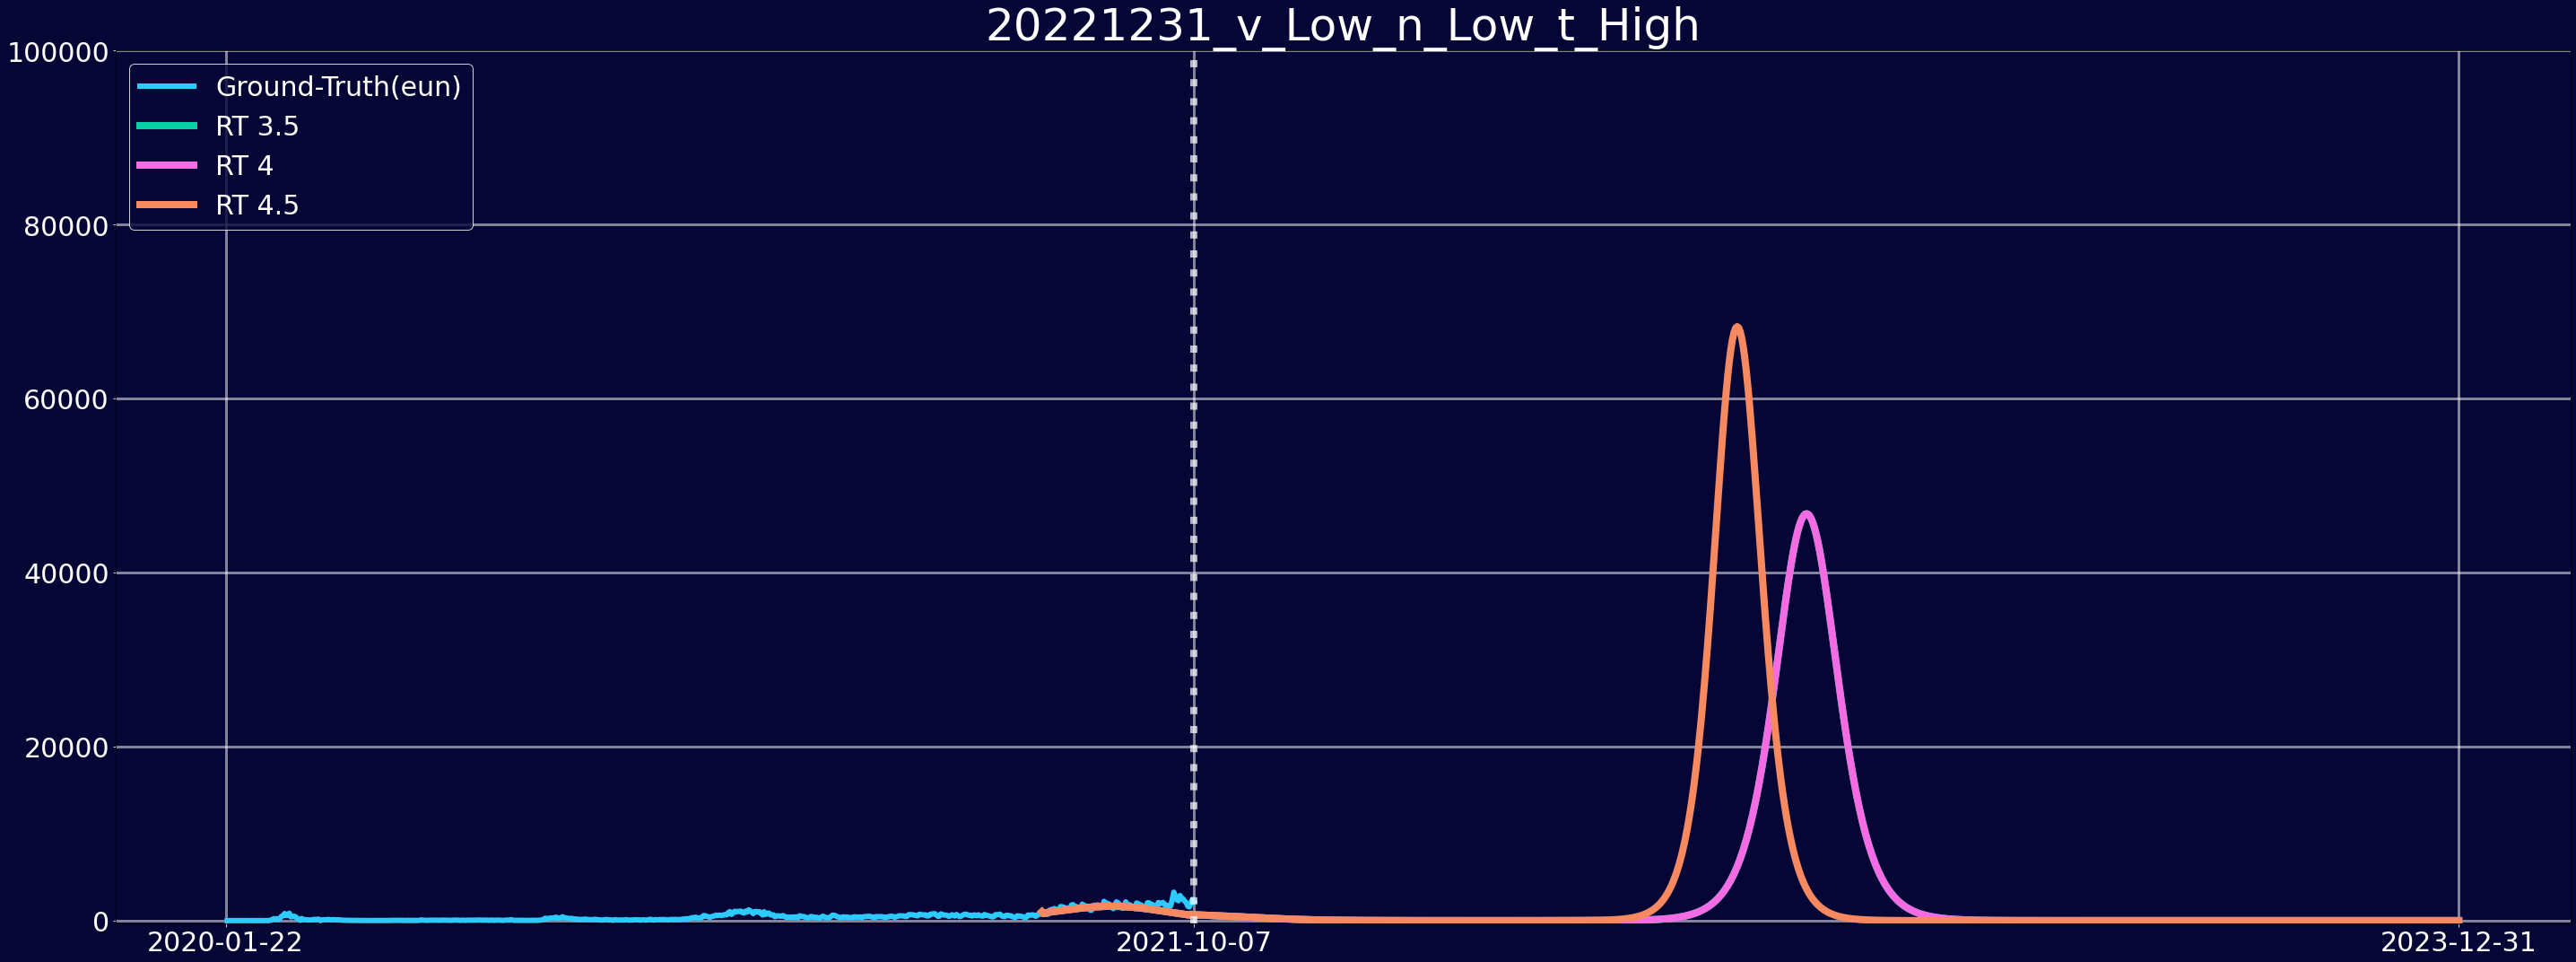

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

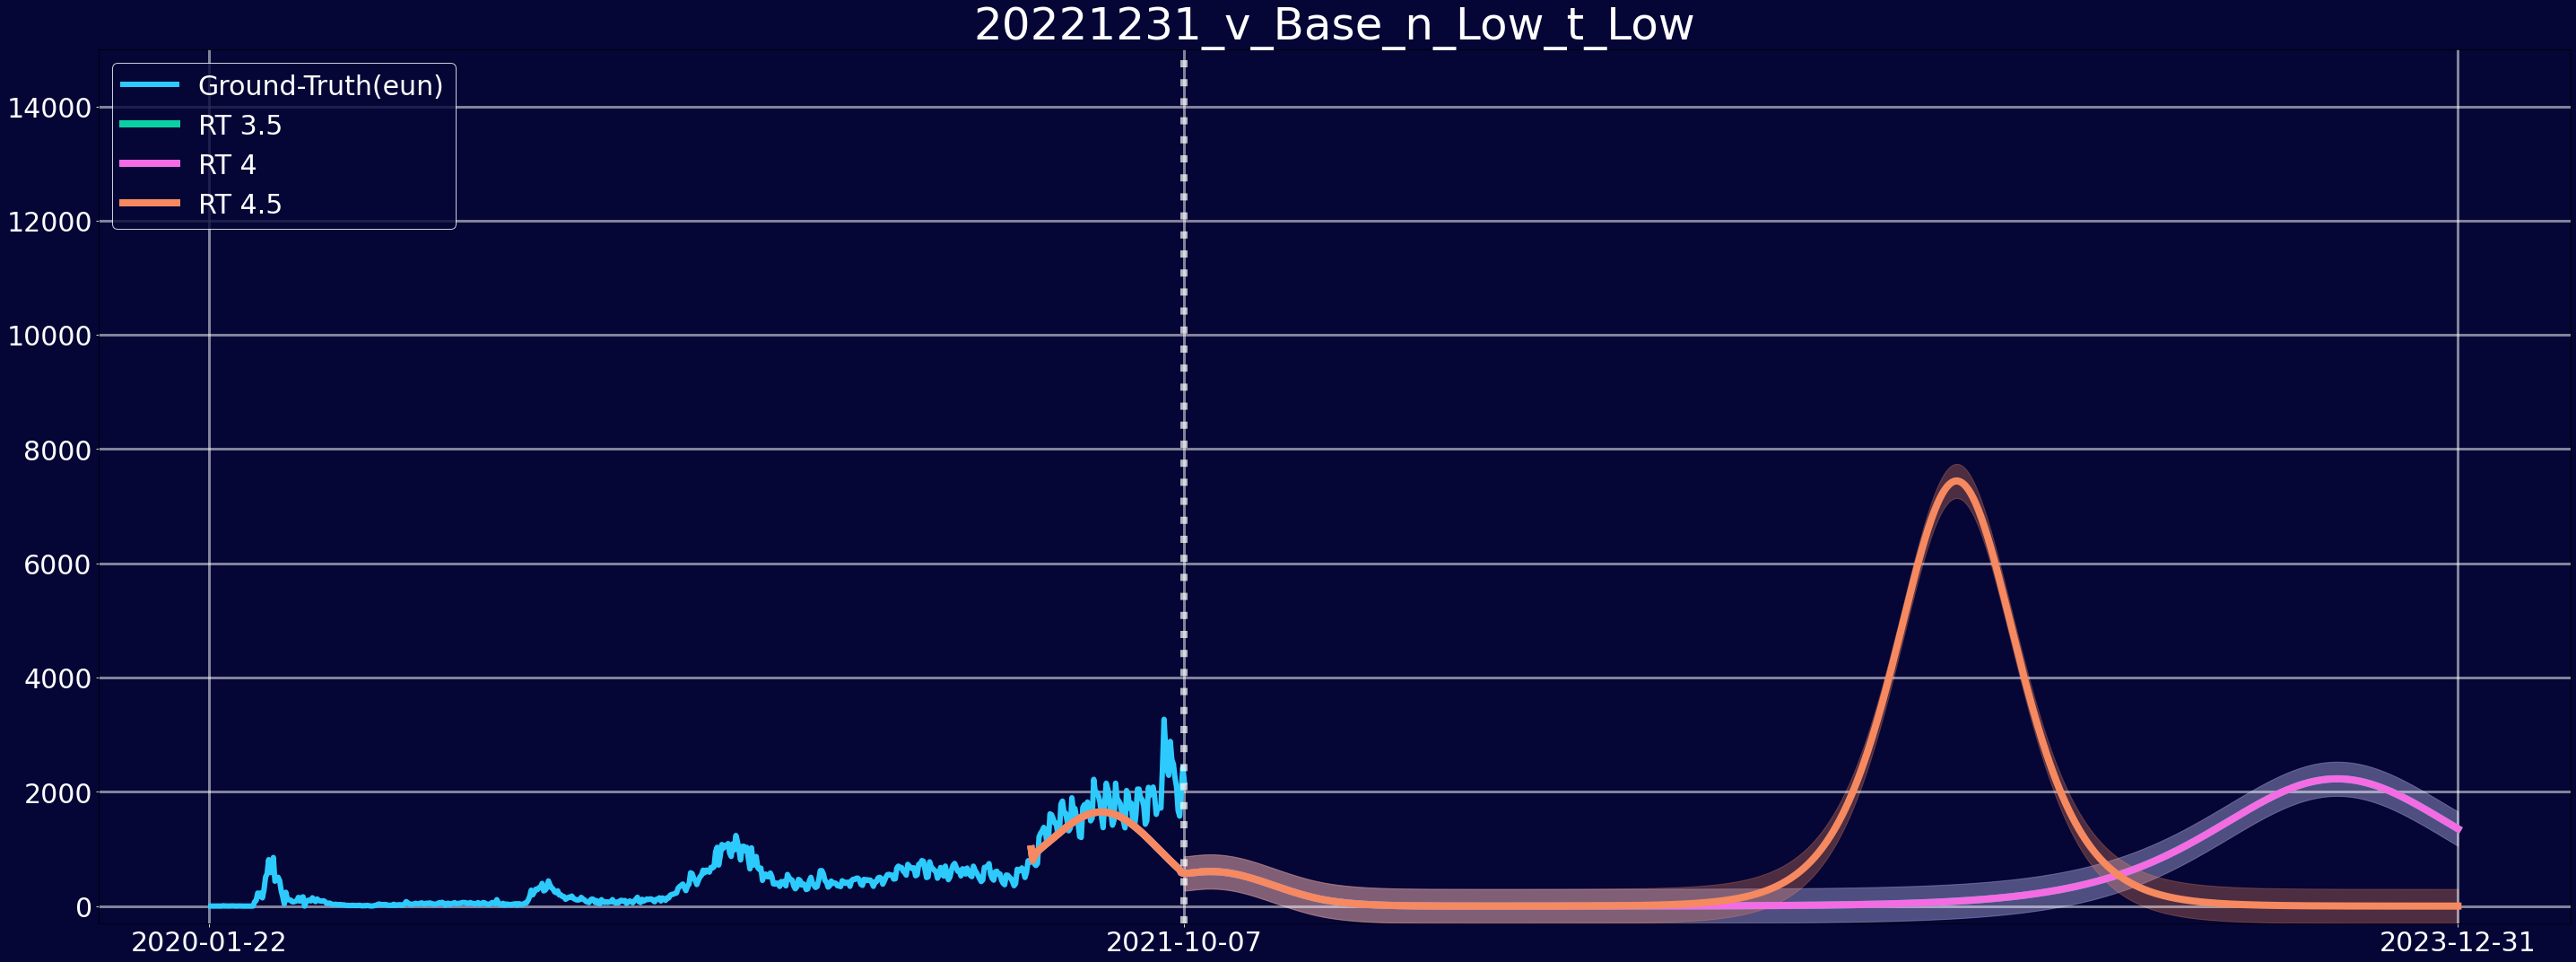

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

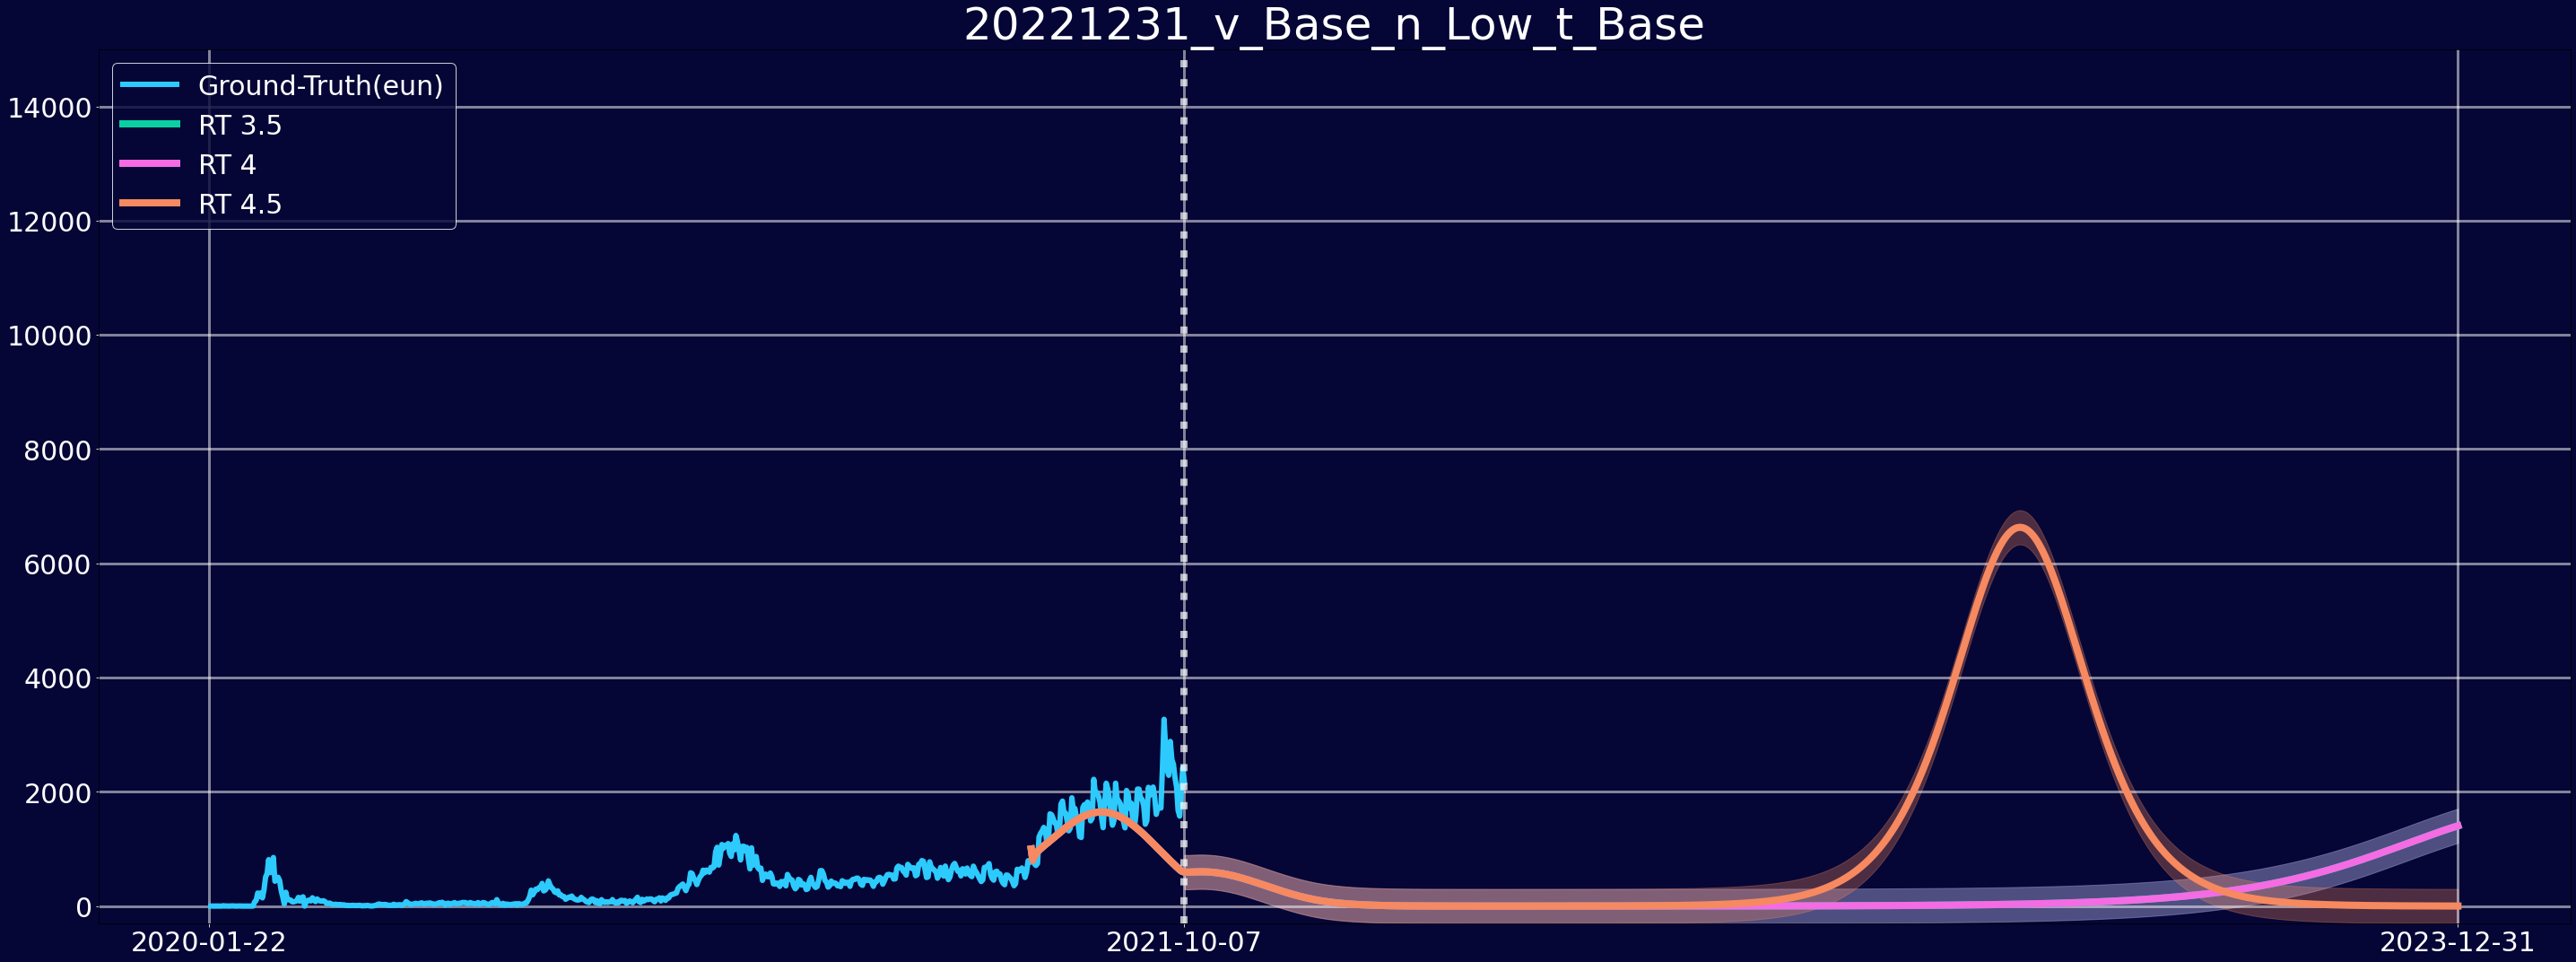

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

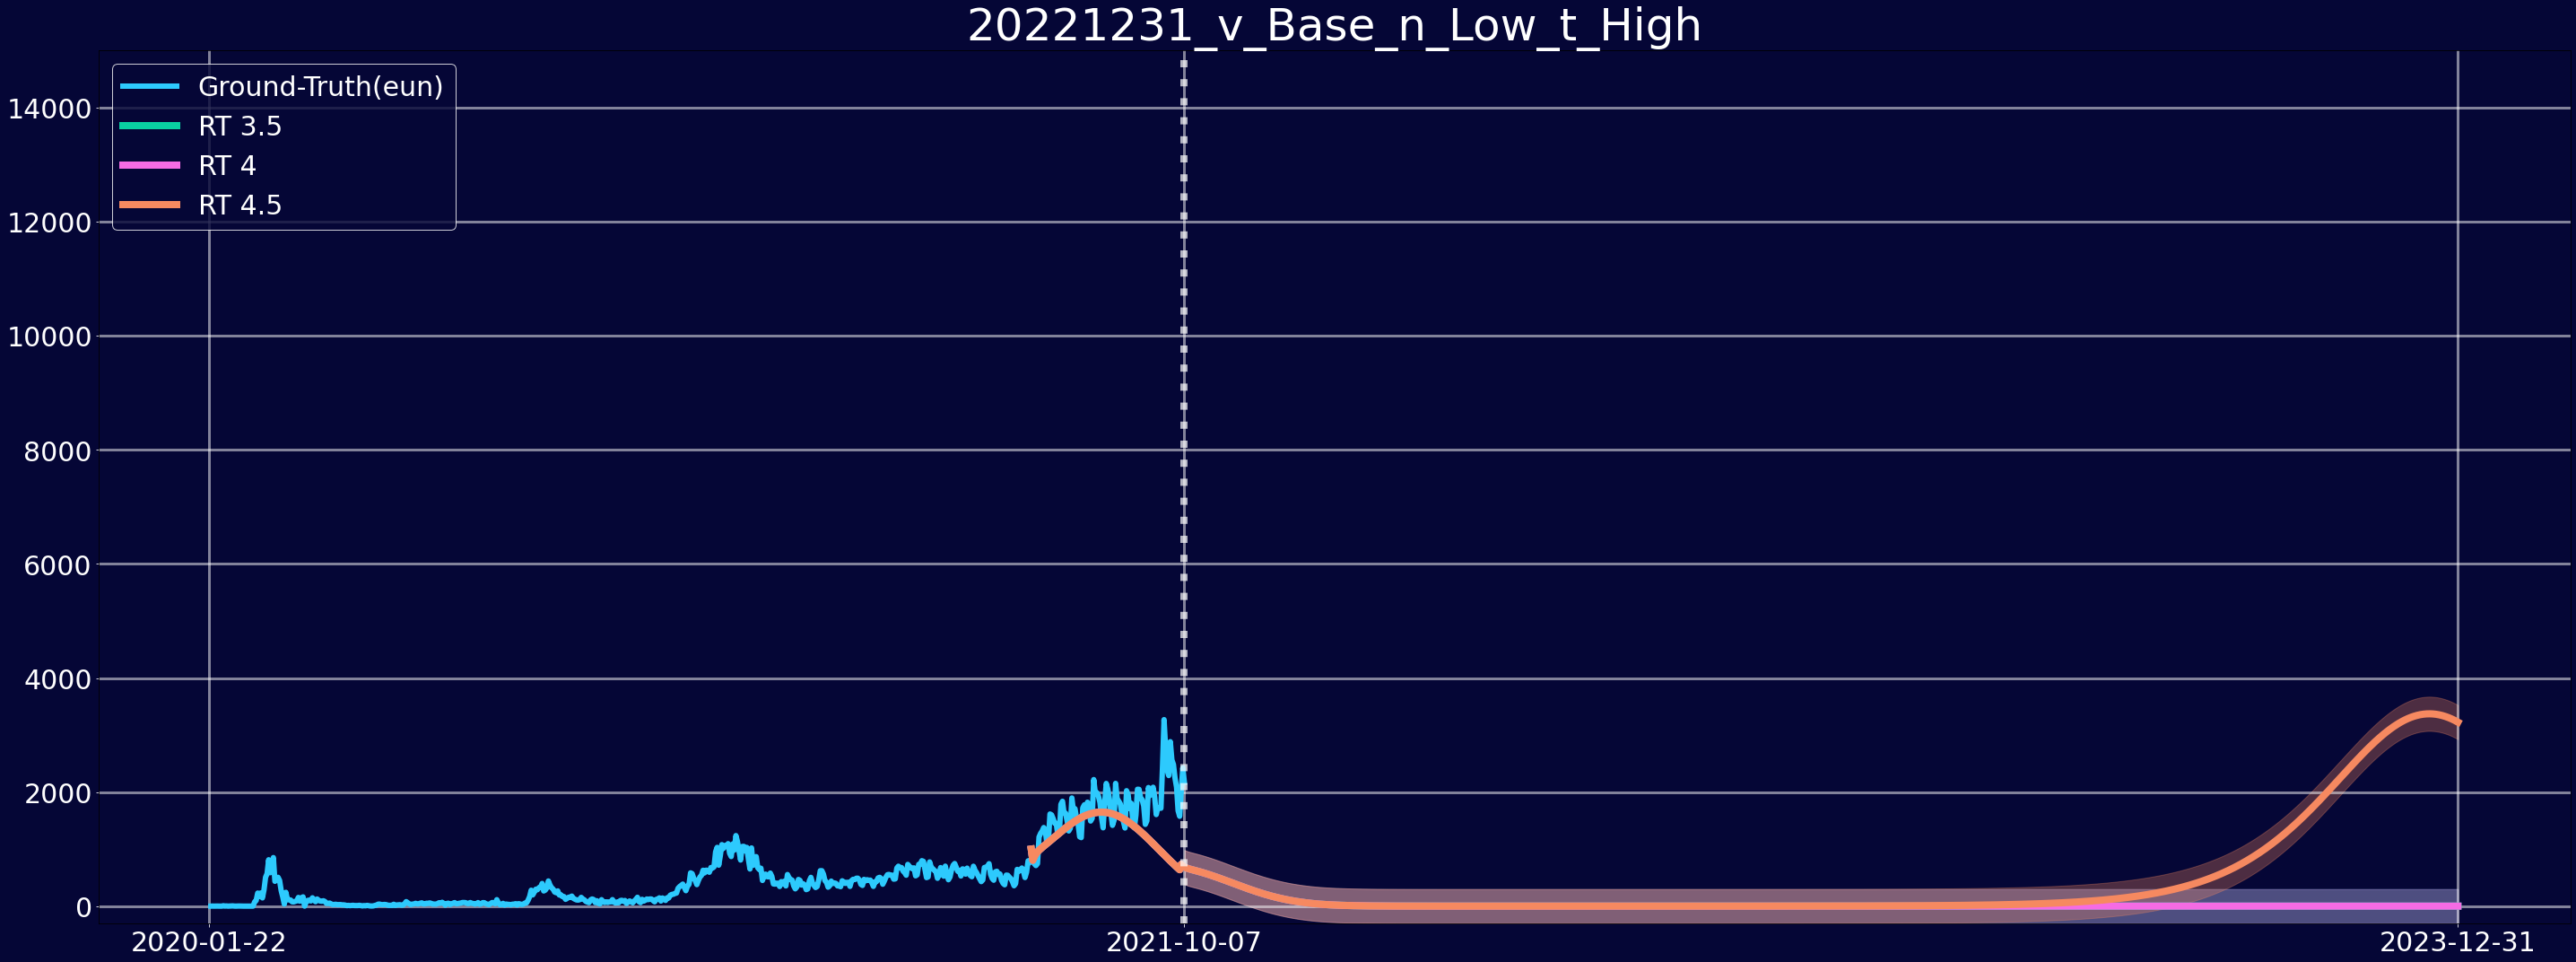

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

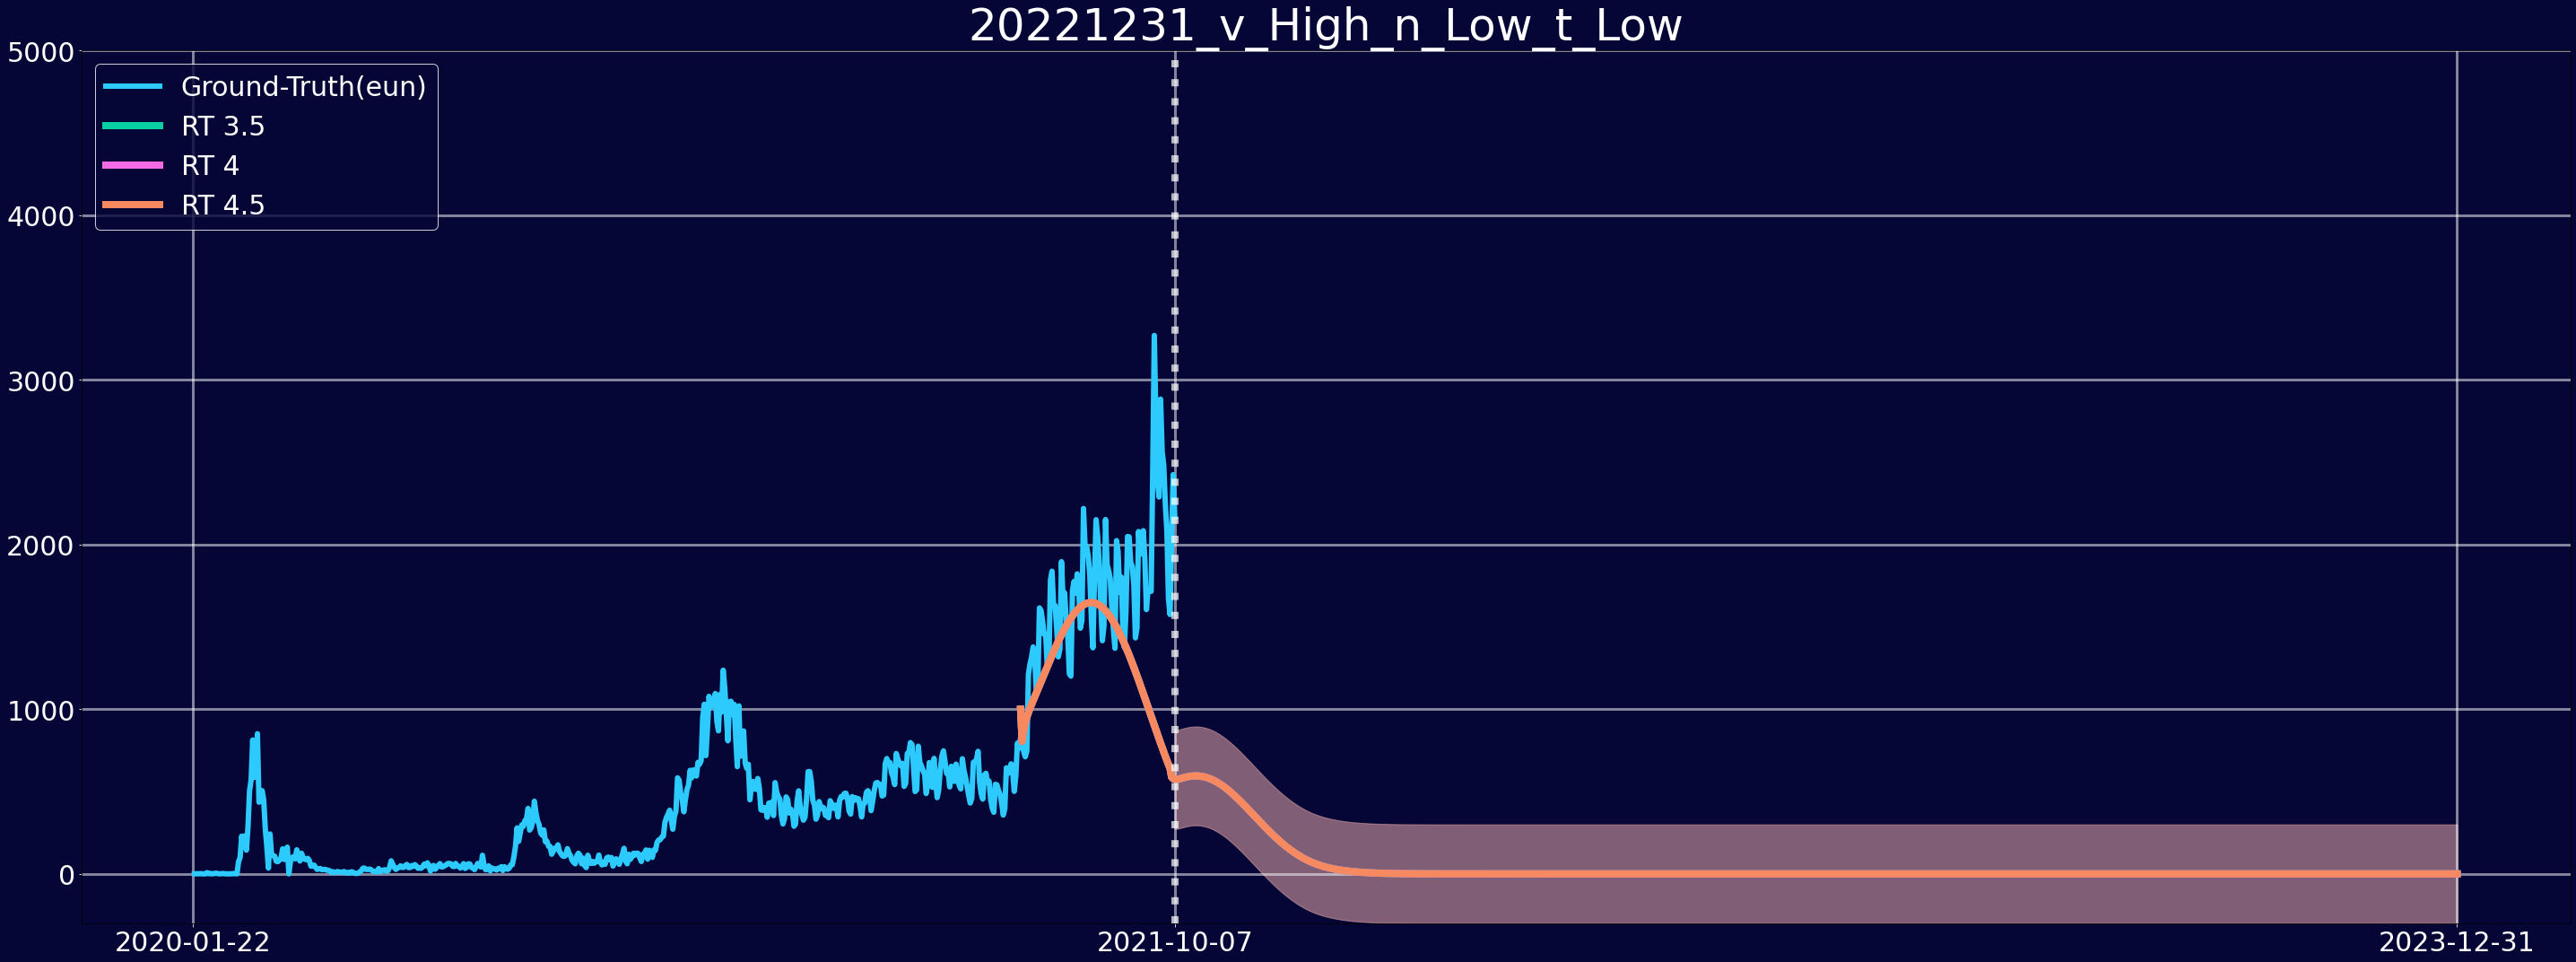

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

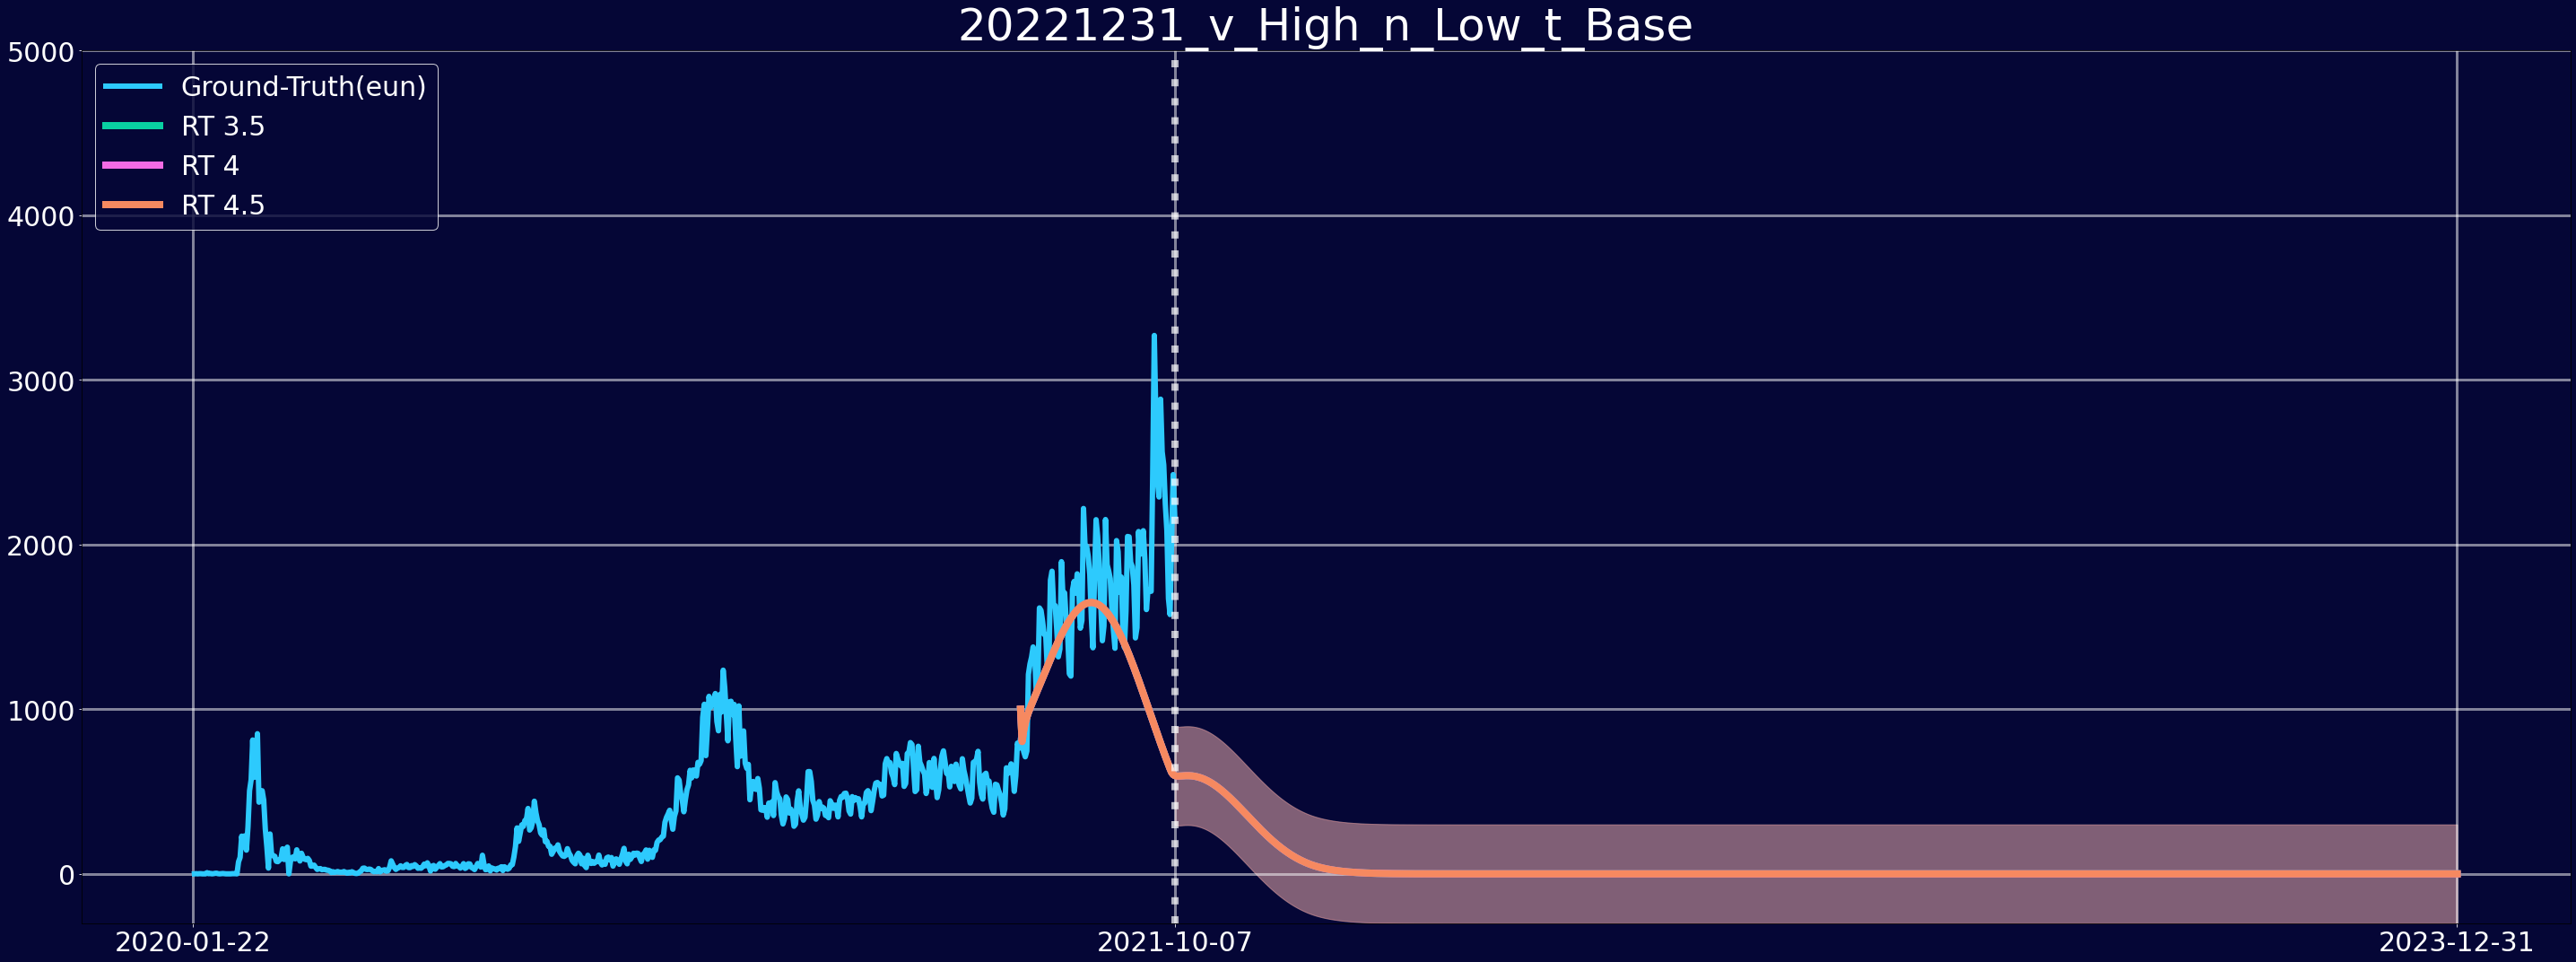

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

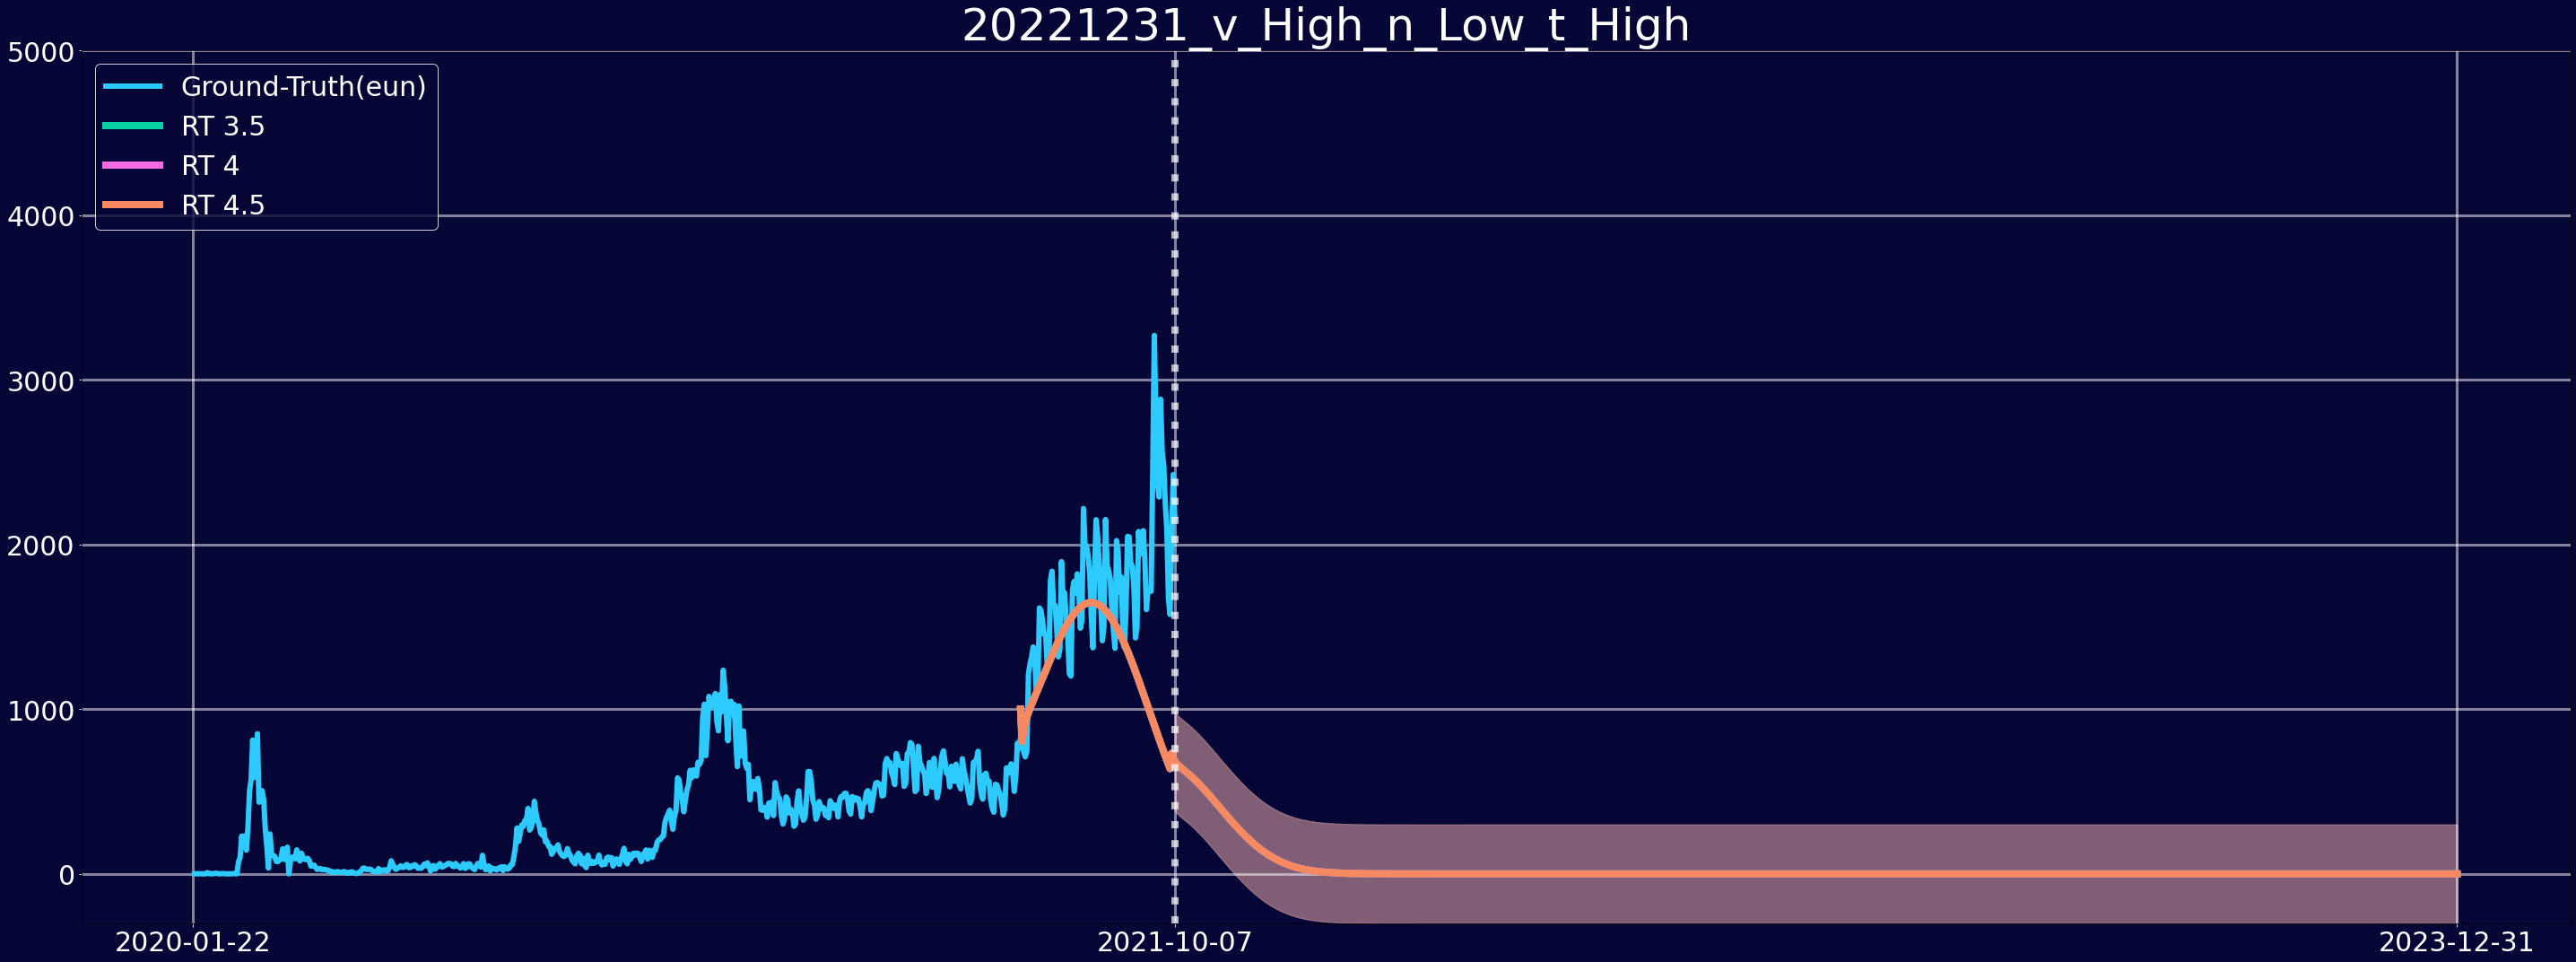

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

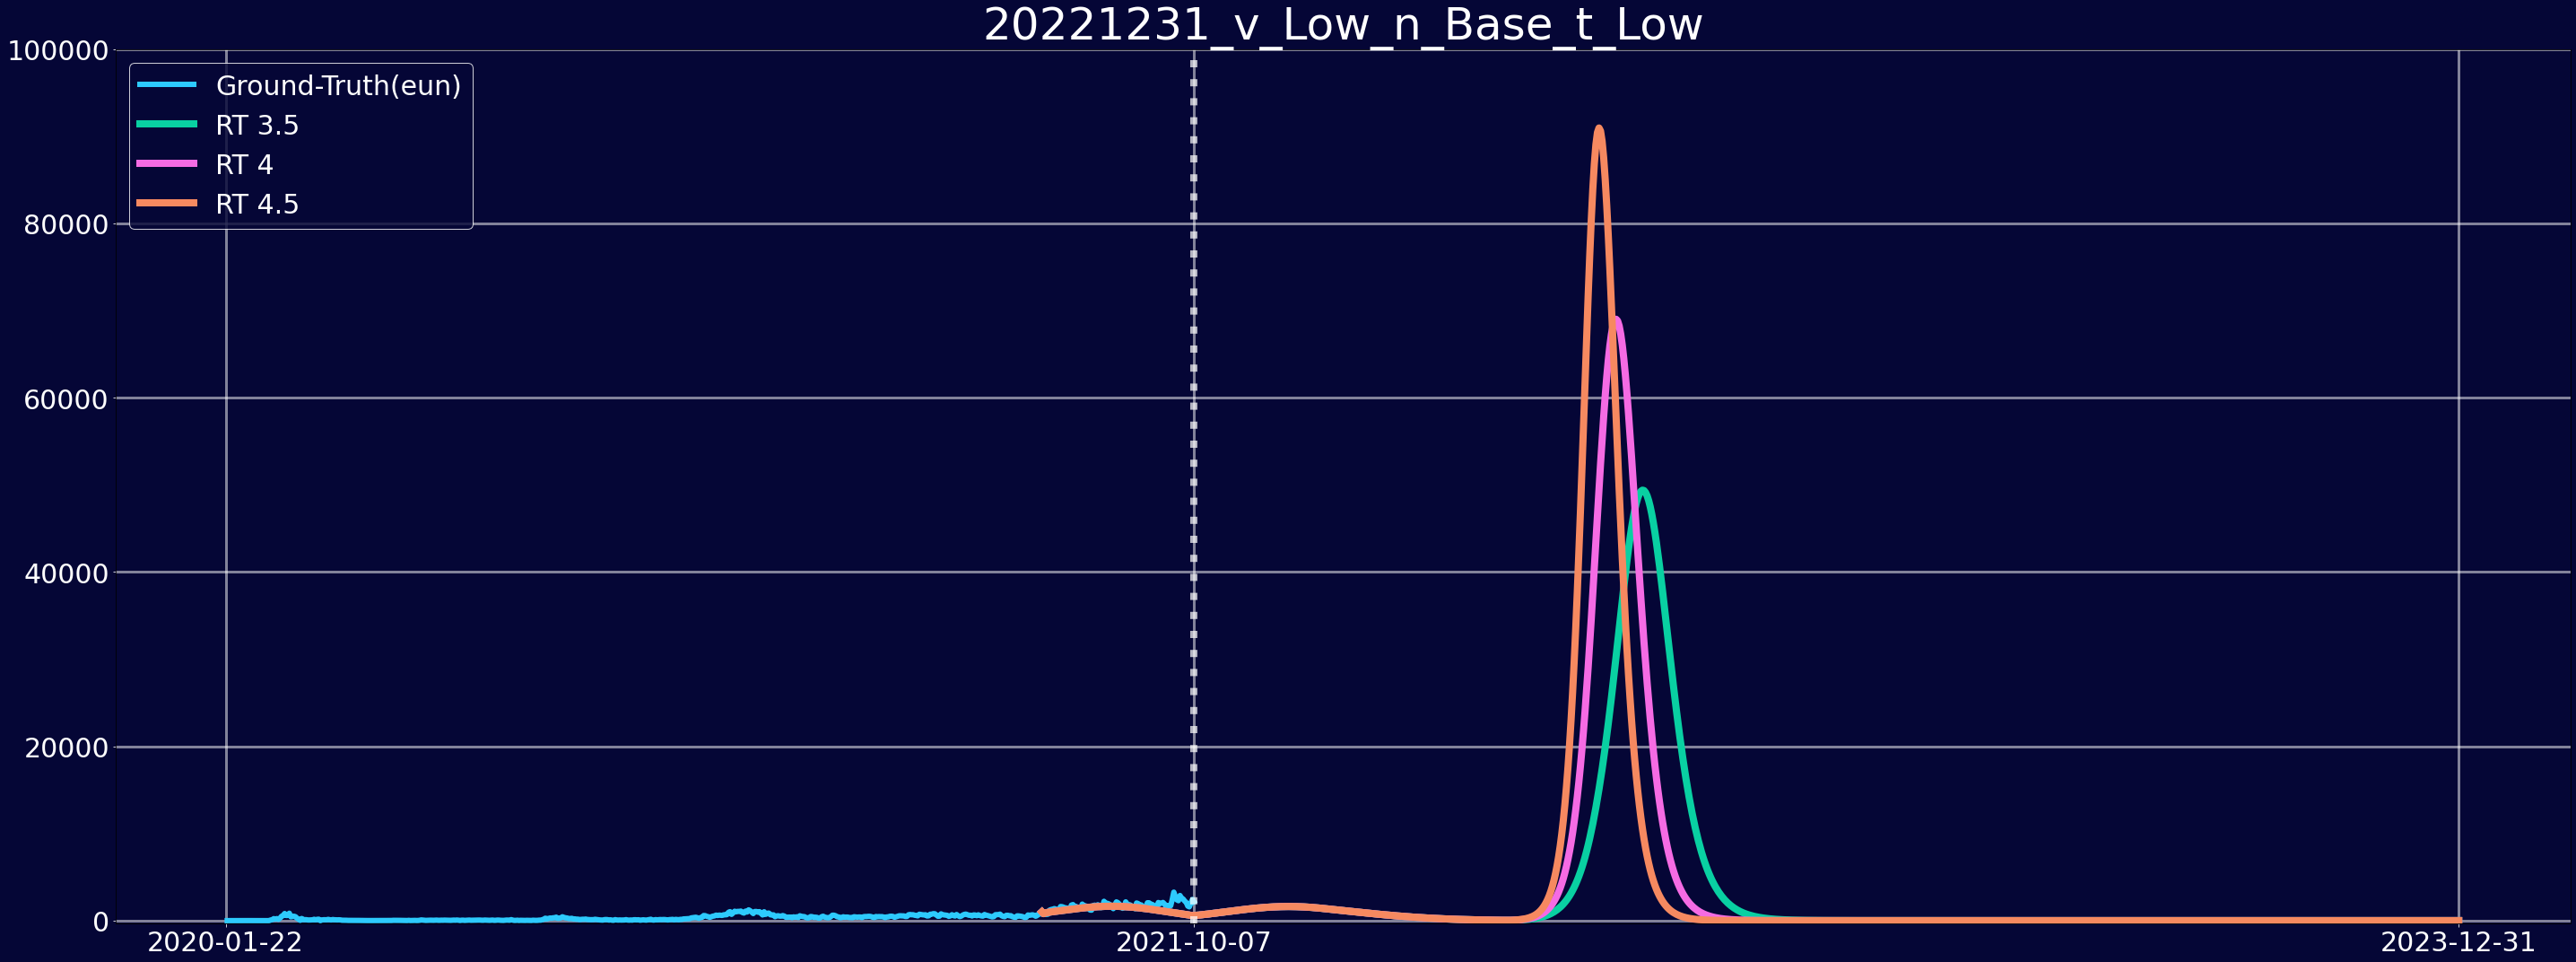

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

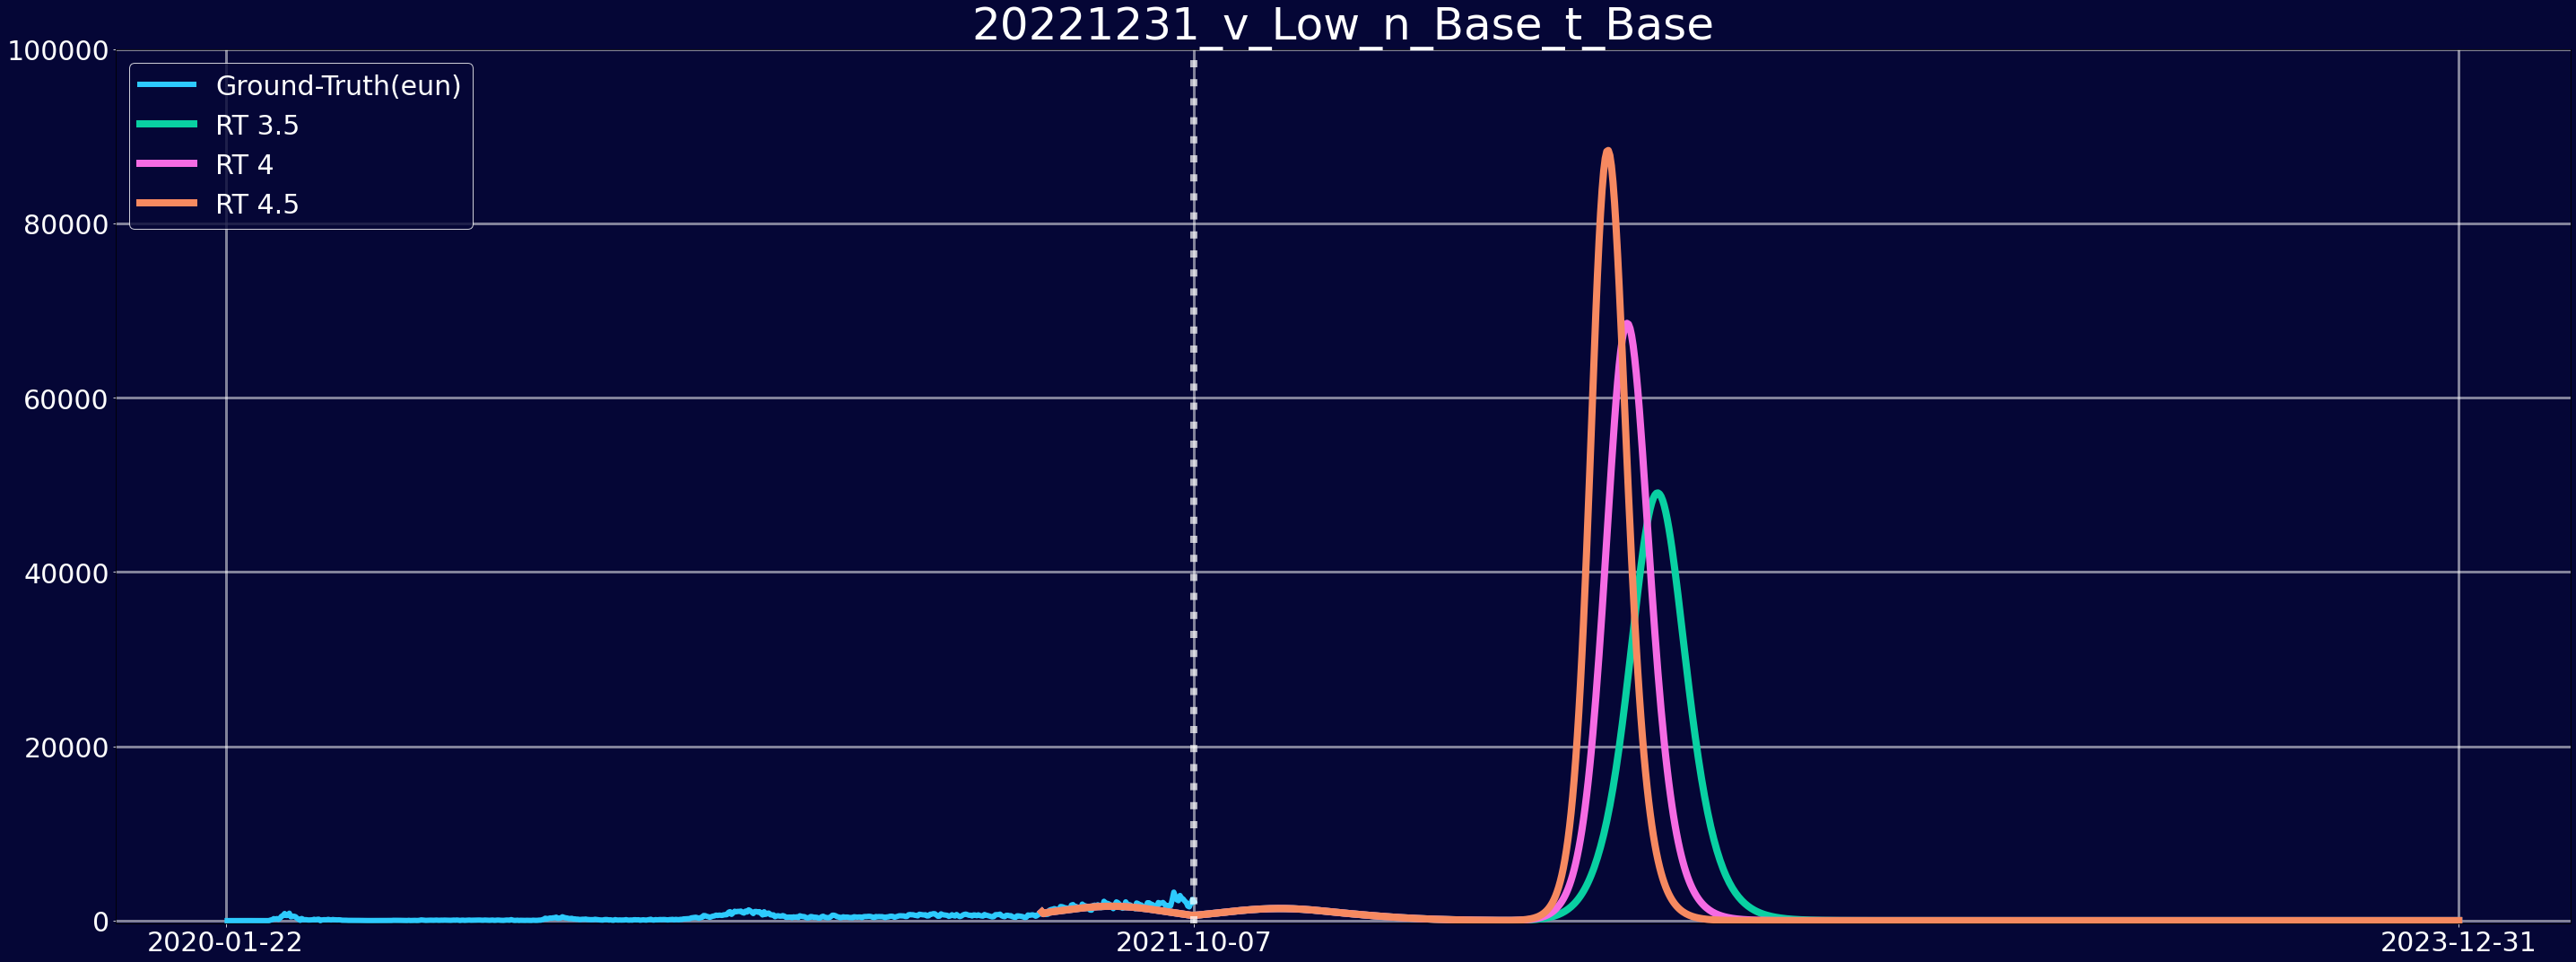

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

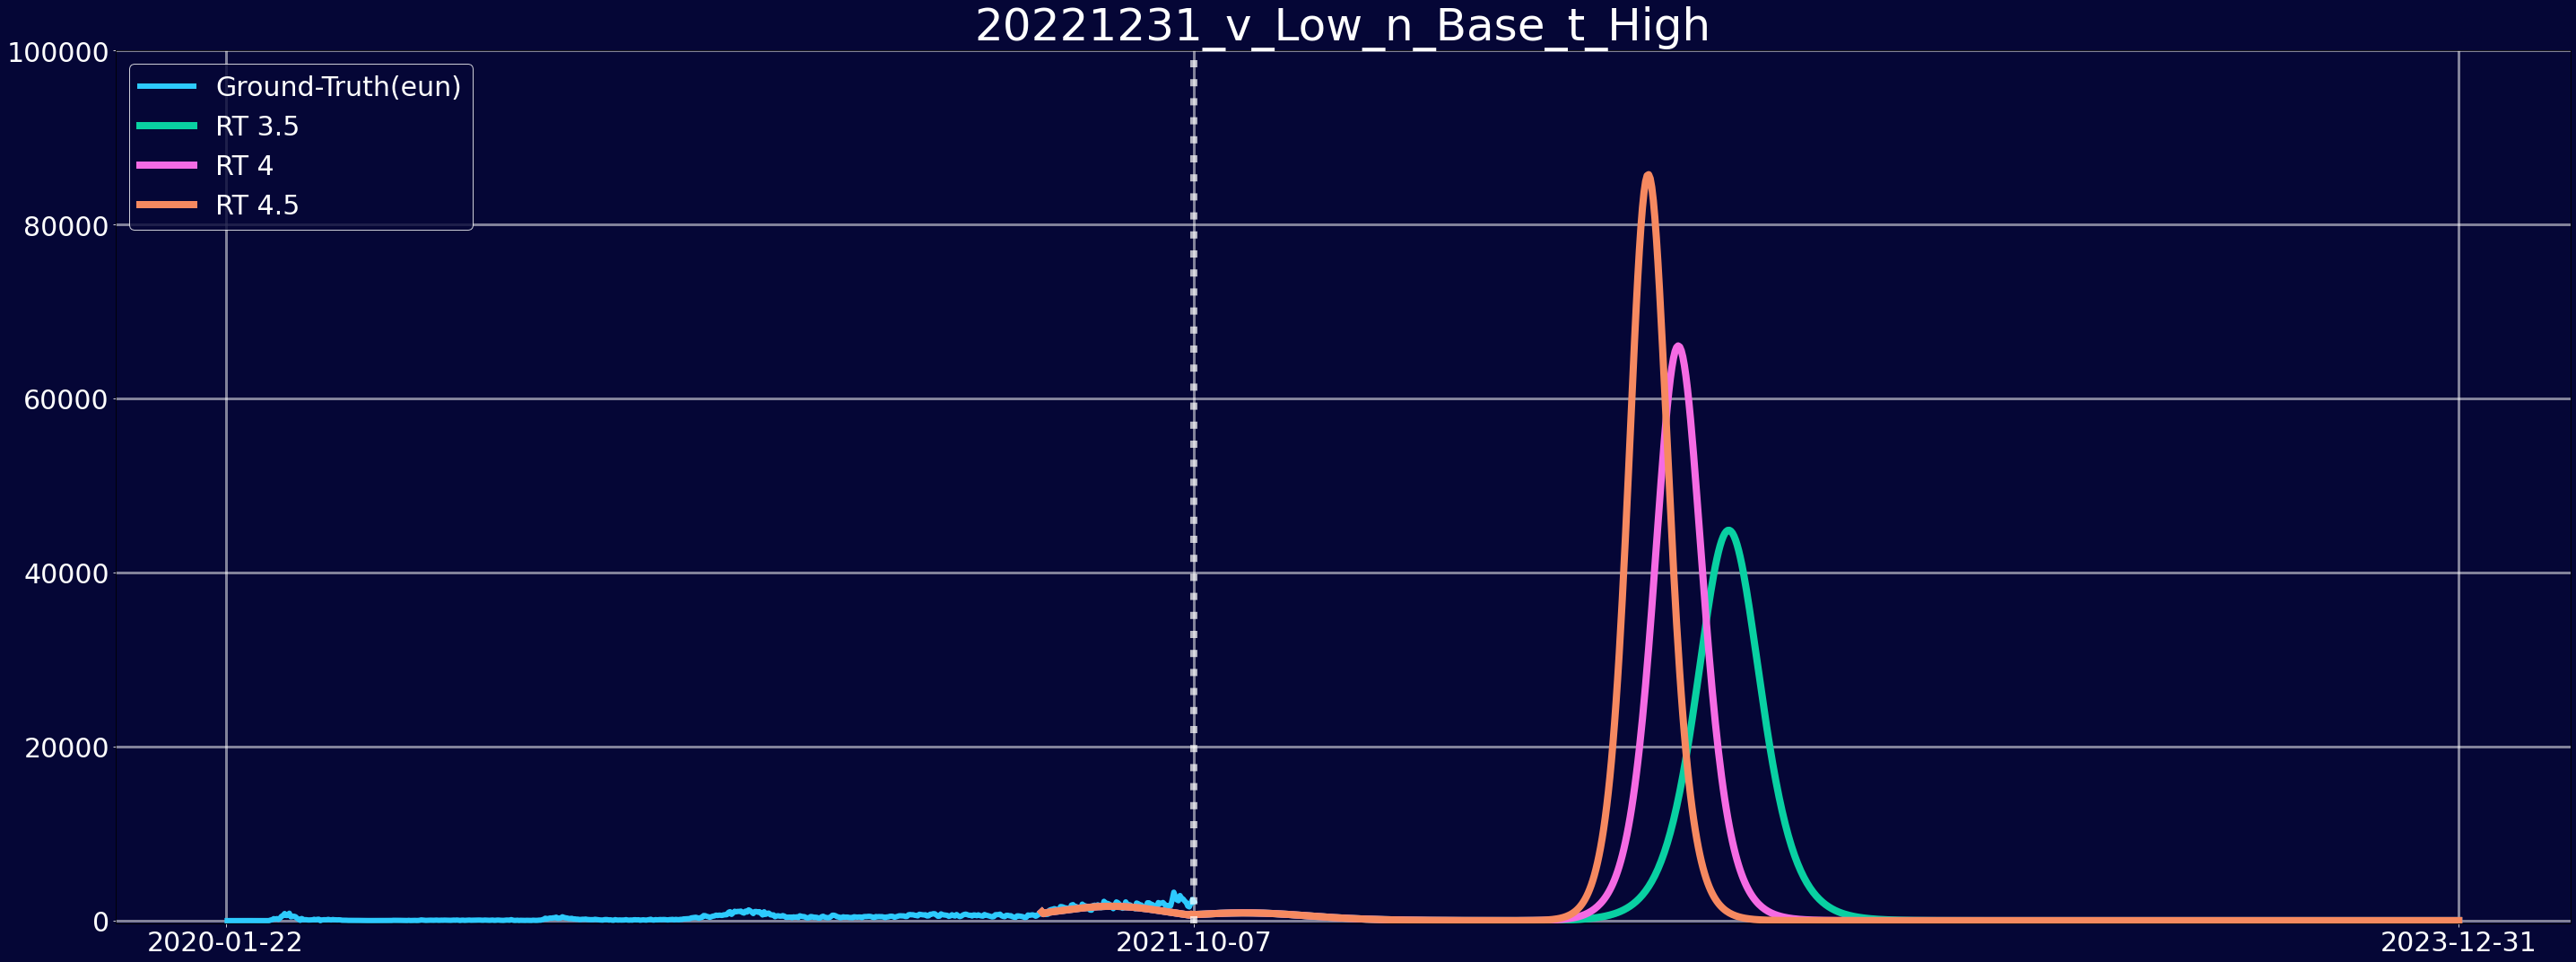

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

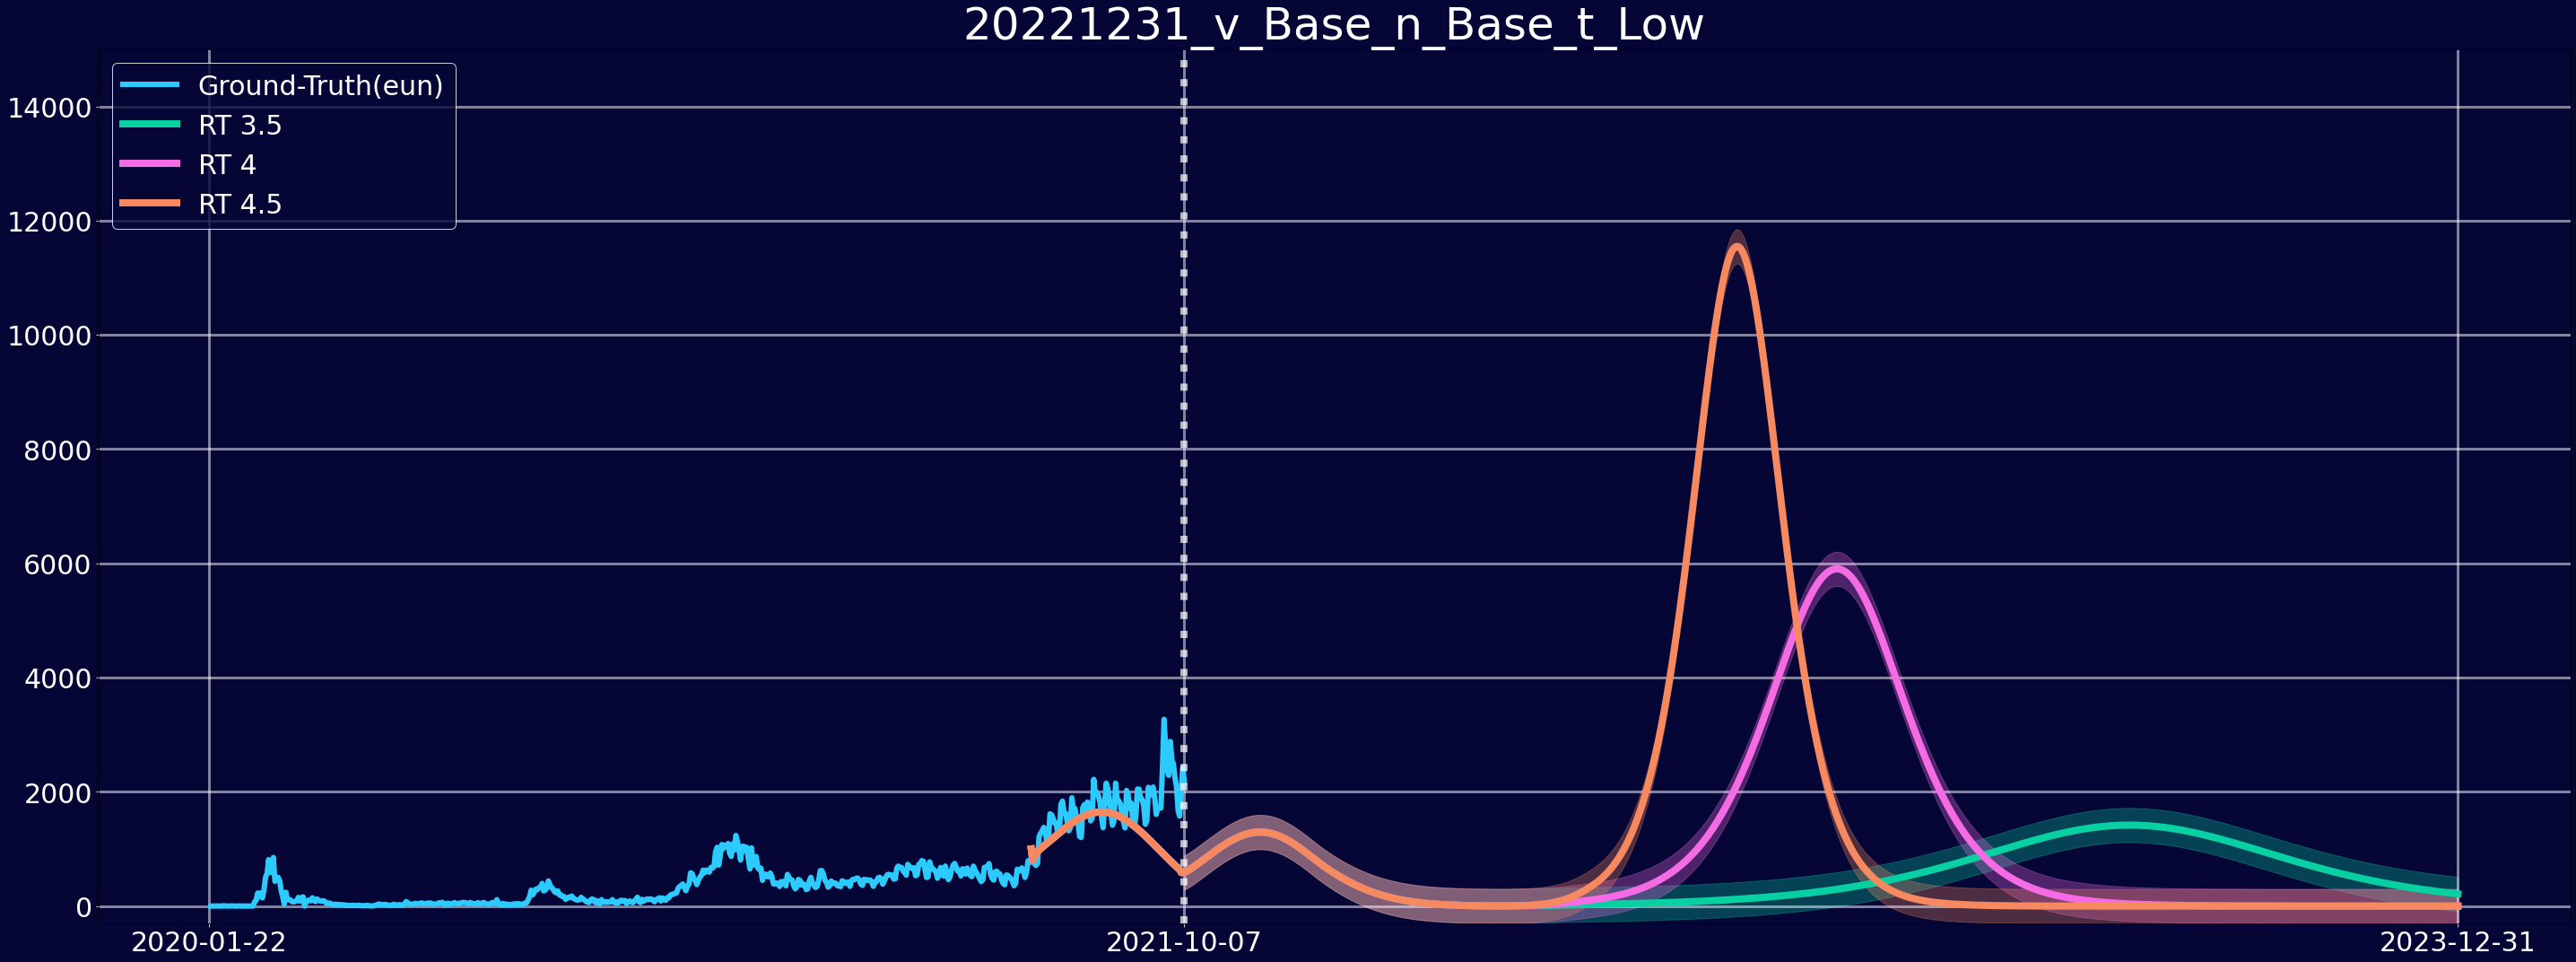

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

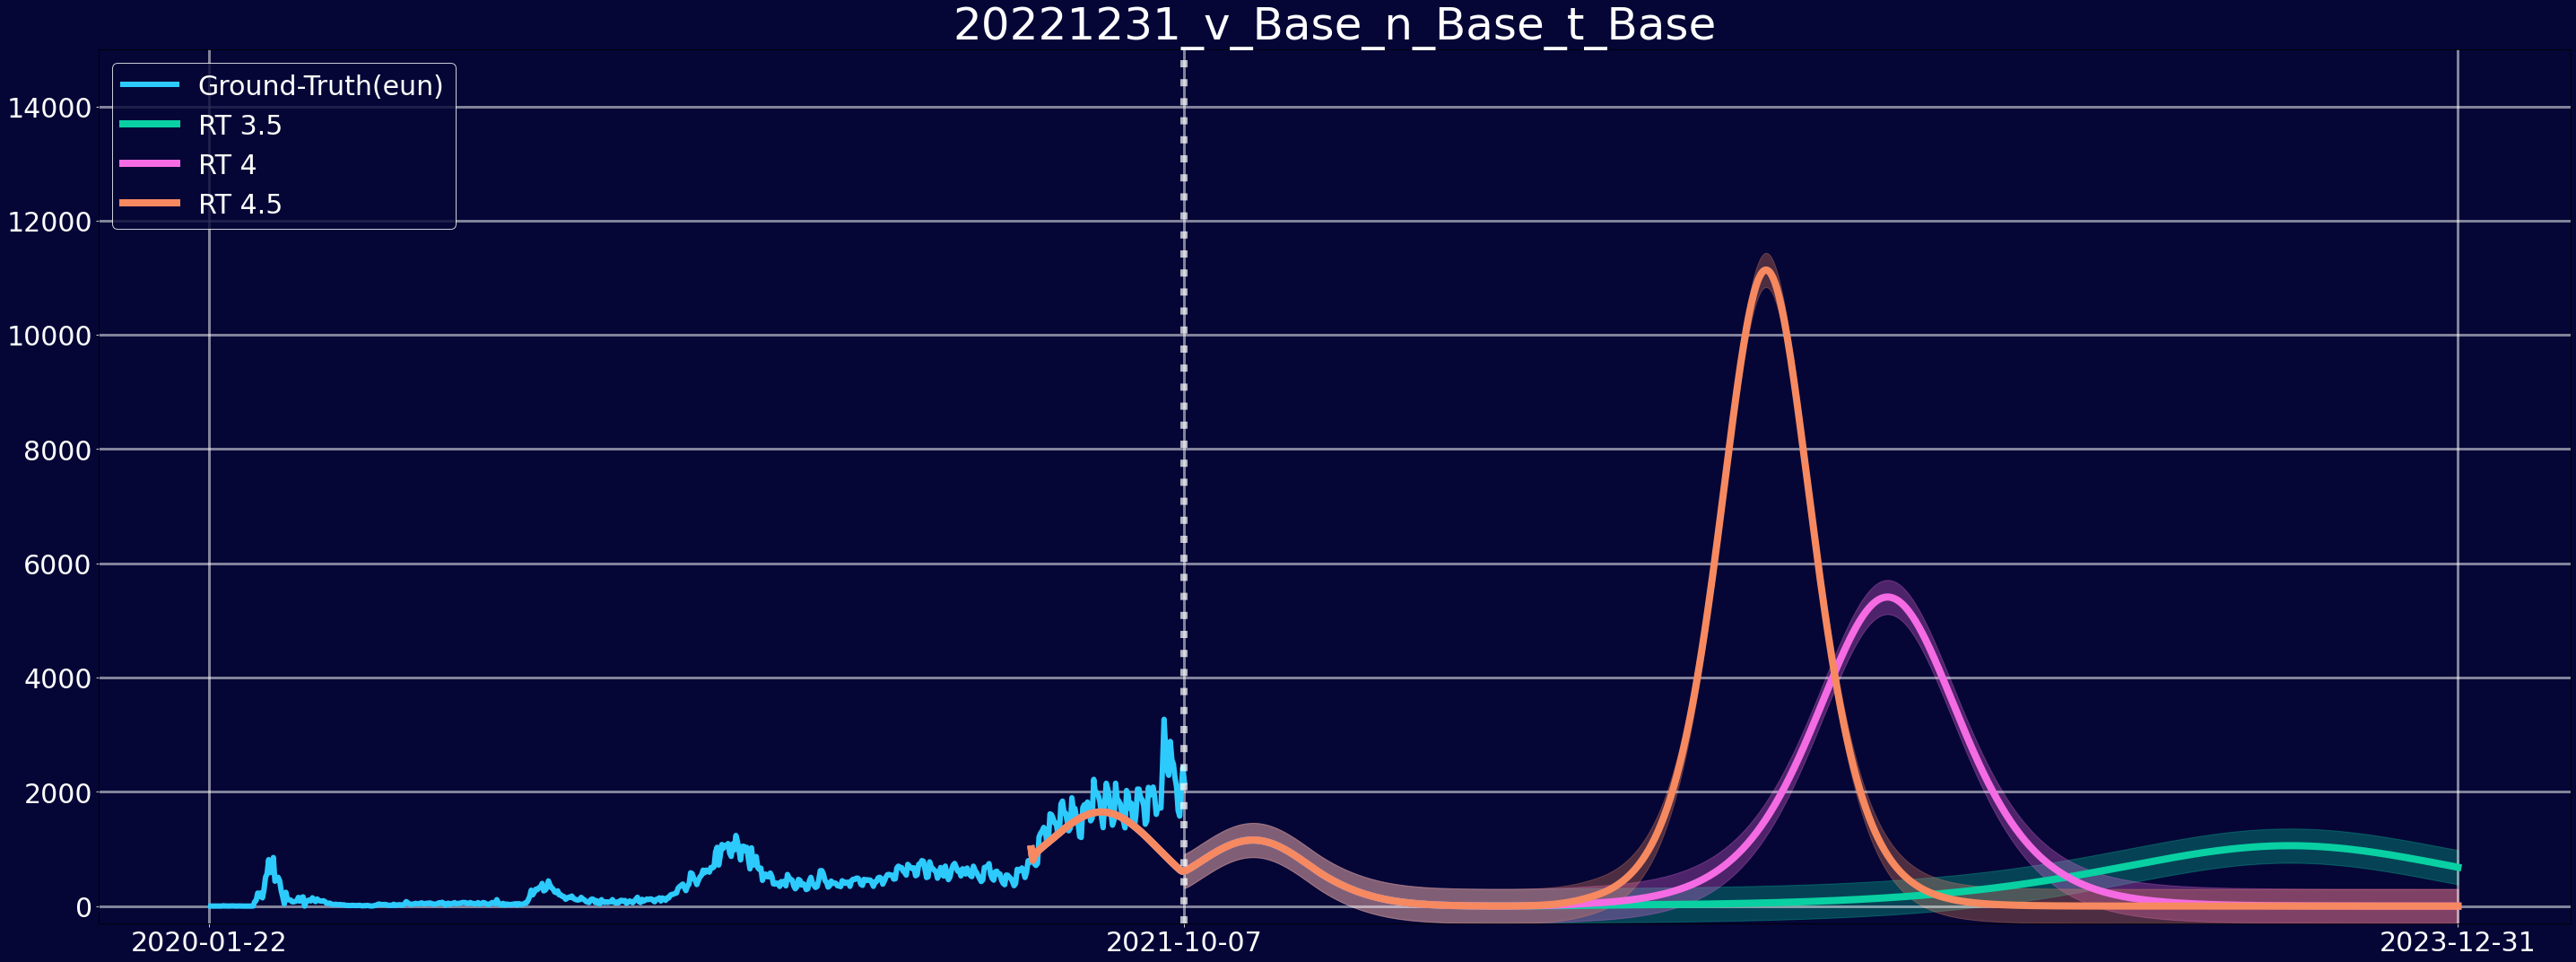

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

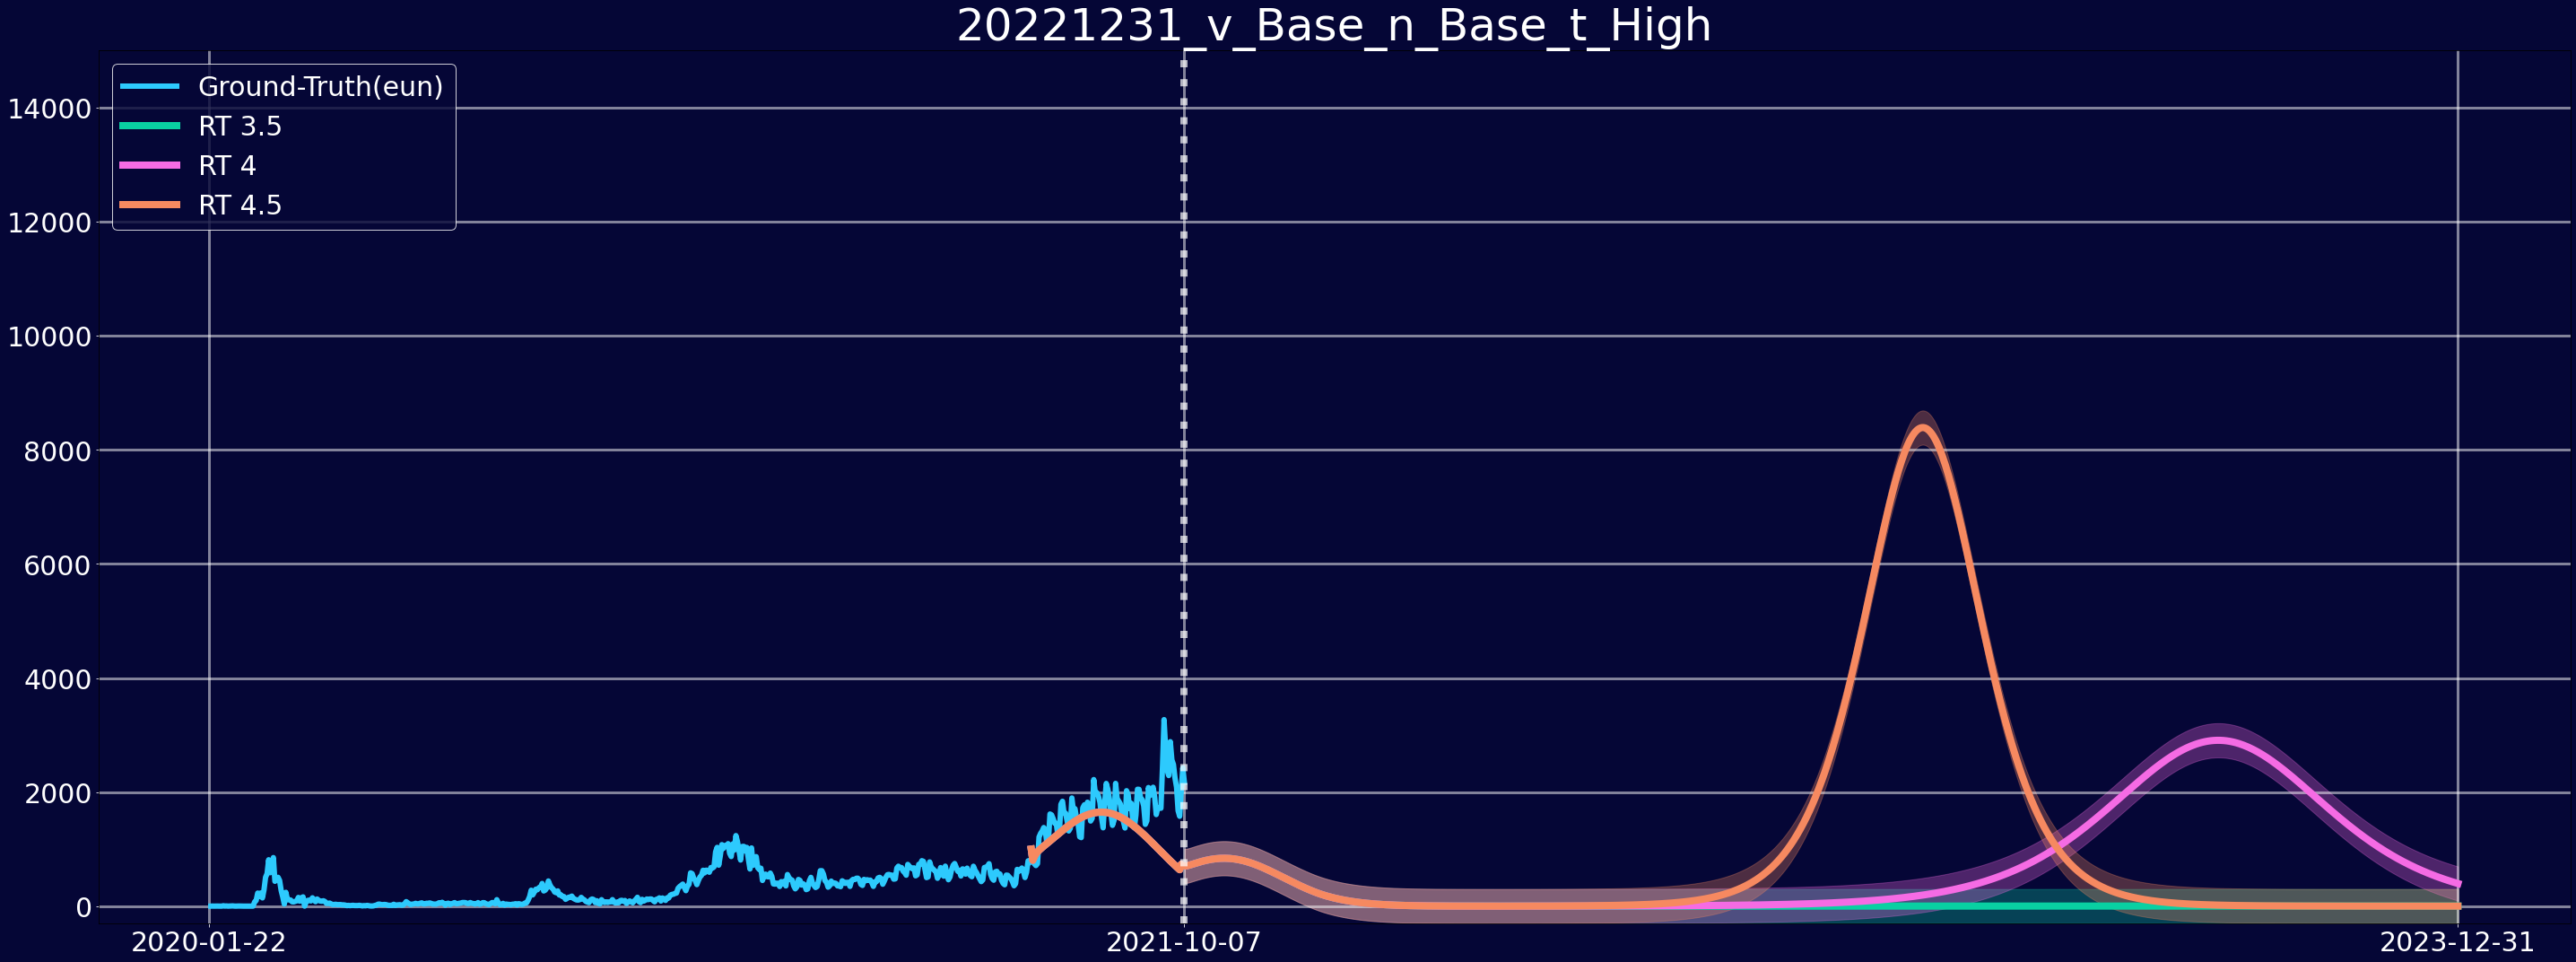

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

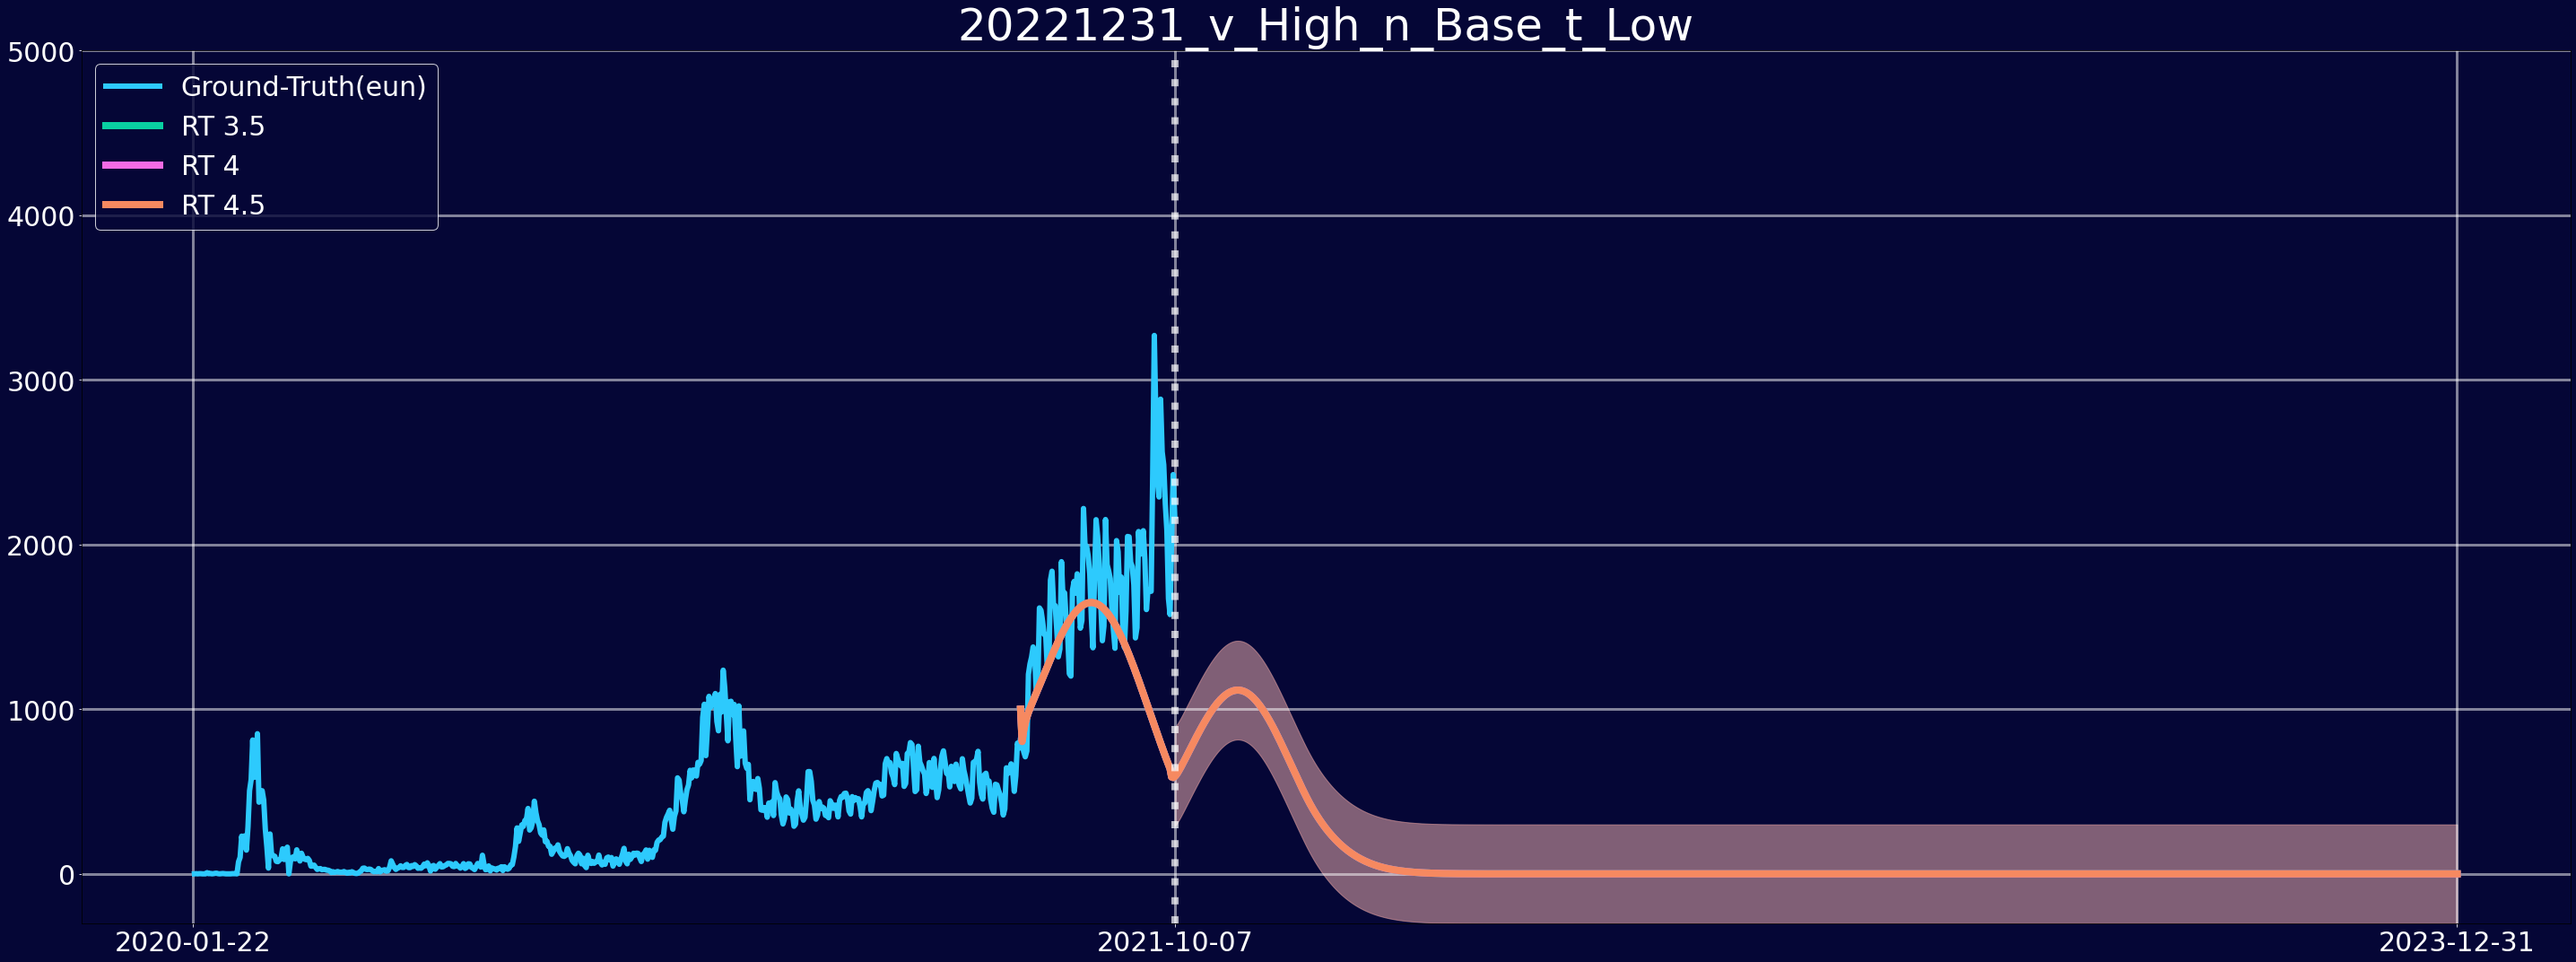

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

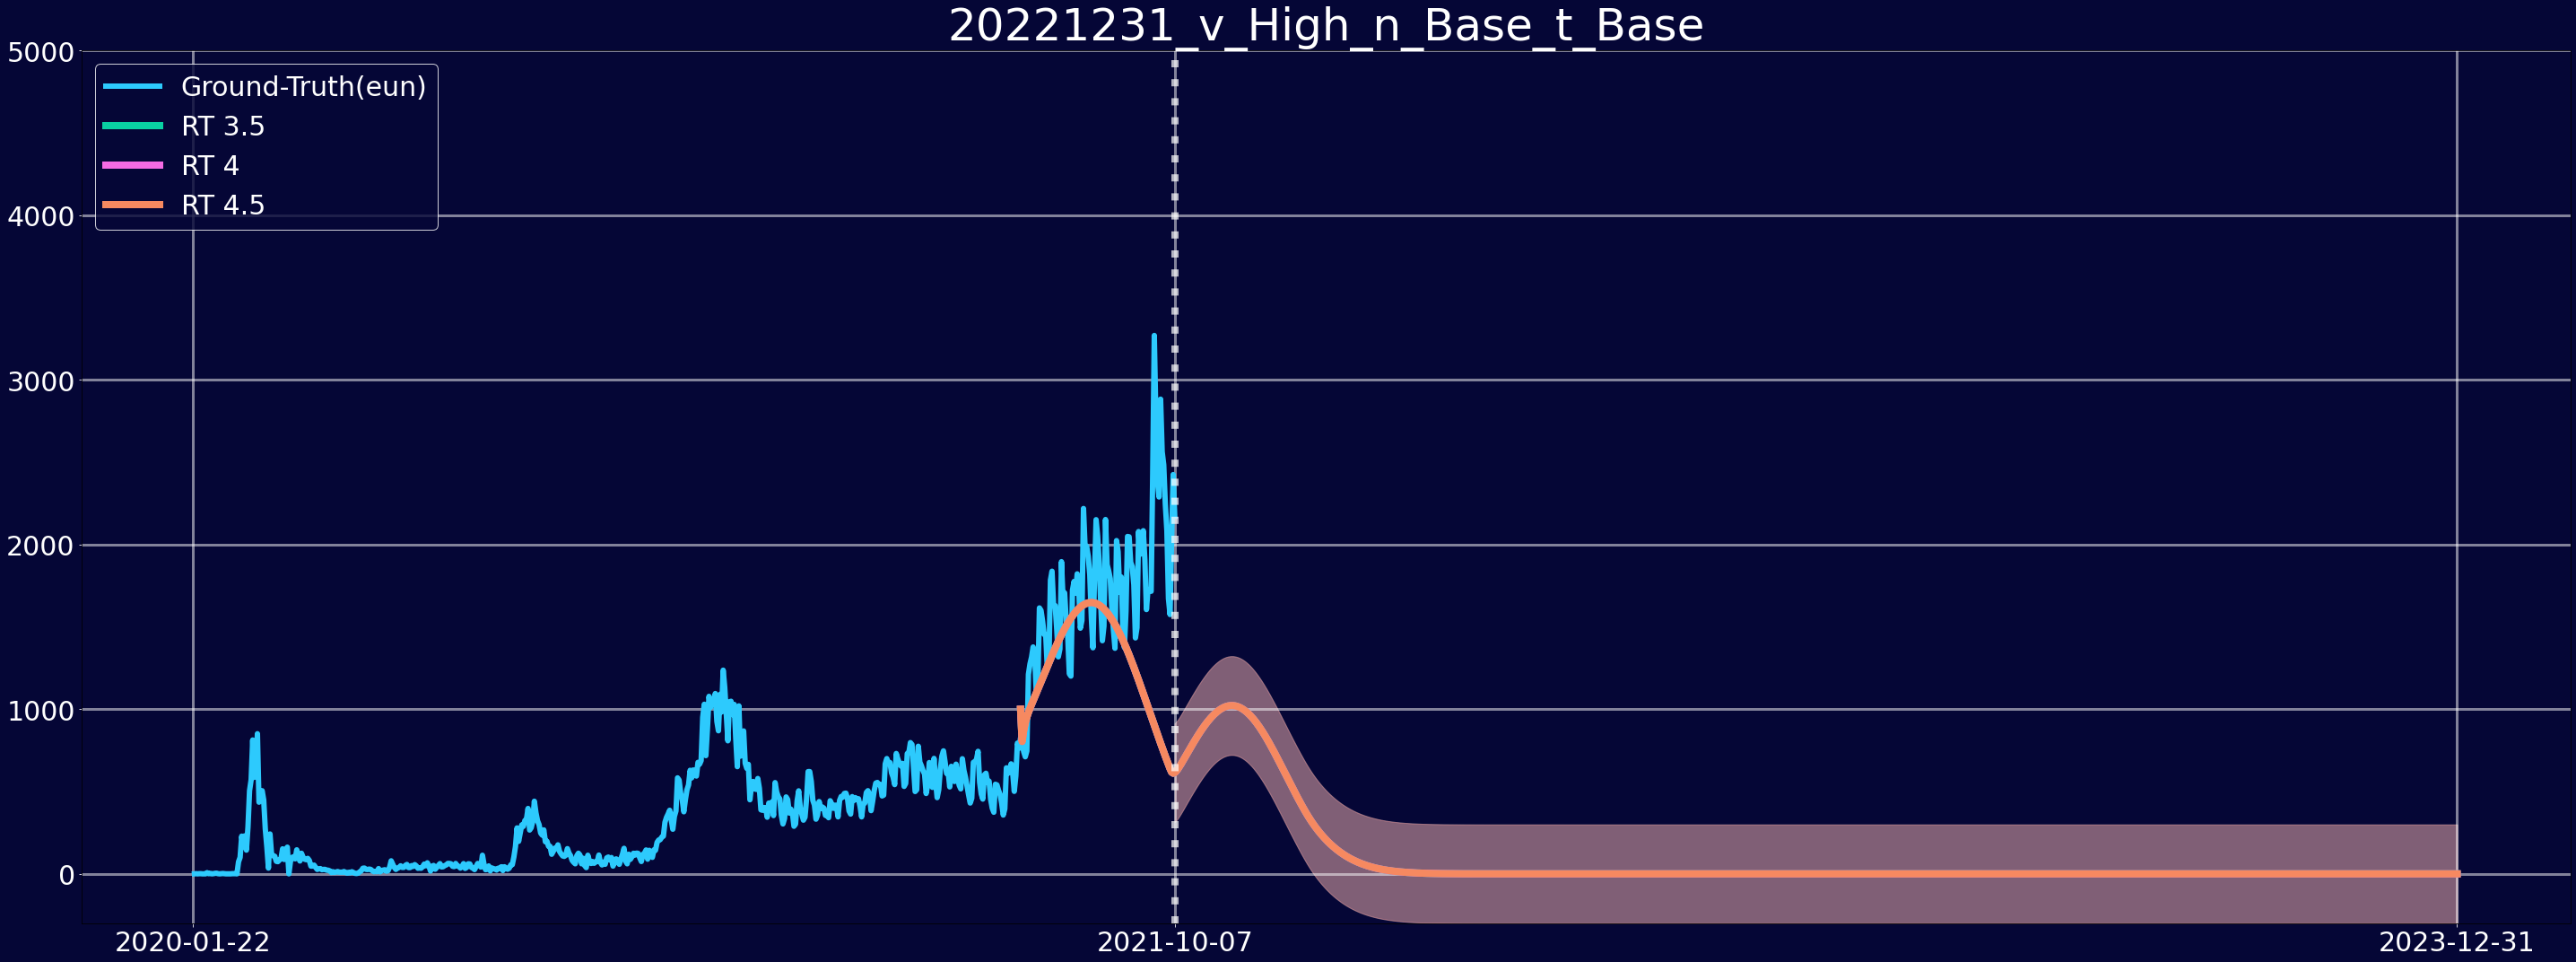

C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data['tDate'] = date
C:\Users\user\AppData\Local\Temp/ipykernel_10048/1592023041.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

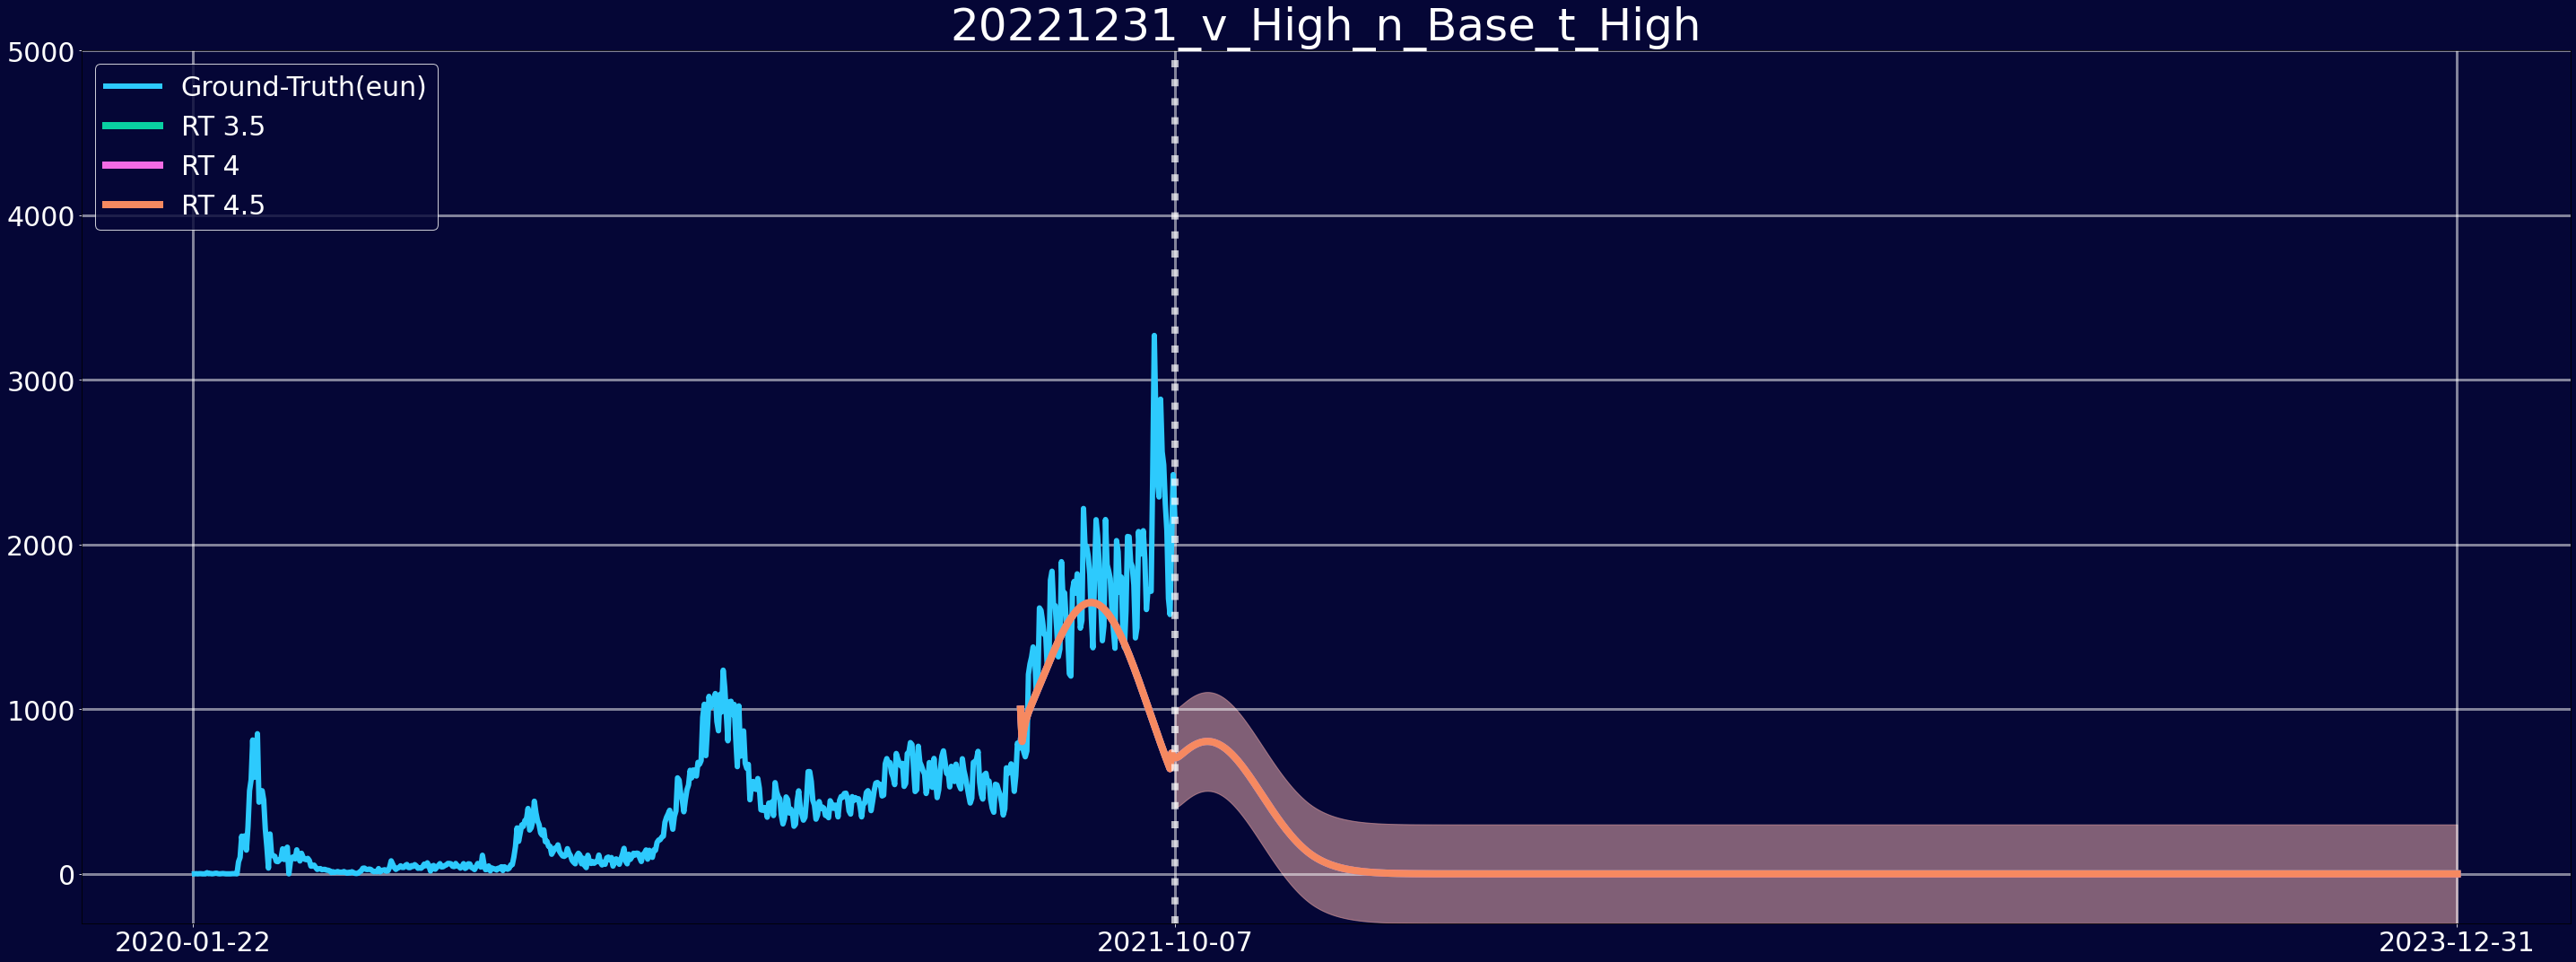

In [55]:
for n in npi:
    if n == npi[1]:      # 0 week
        file_name_n1 = 'n_Base'
    elif n == npi[0]:   # 2 weeks
        file_name_n1 = 'n_Low'
#     elif n == npi[2]:   # 4 weeks
#         file_name_n1 = 'n_High'
    for v in vac:
        if v == vac[1]:      # base
            file_name_vac = 'v_Base'
            y_lim = [-300,15000]
        elif v == vac[0]:   # low
            file_name_vac = 'v_Low'
            y_lim = [-300,100000]
        elif v == vac[2]:   # high
            file_name_vac = 'v_High'
            y_lim = [-300,5000]
#         for n2 in npi2:
#             if n2 == npi2[1]:      # base
#                 file_name_n2 = 'n2_Base'
#             elif n2 == npi2[0]:   # low
#                 file_name_n2 = 'n2_Low'
# #             elif n2 == npi2[2]:   # high
# #                 file_name_n2 = 'n2_High'
        for t in test:
            if t == test[1]:      # base
                file_name_test = 't_Base'
            elif t == test[0]:   # low
                file_name_test = 't_Low'
            elif t == test[2]:   # high
                file_name_test = 't_High'
            
            file_name = file_name_date+'_'+file_name_vac+"_"+file_name_n1+"_"+file_name_test
            rt_tp_data = tp_data.loc[(tp_data['NPI']==n)&(tp_data['VACCINE_']==v)&(tp_data['TEST_']==t)]
    #         rt_s_d_data = s_d_data.loc[(s_d_data['NPI_']==n)&(s_d_data['VACCINE_']==v)&(tp_data['TEST_']==test[0])]
            TP_Plot(rt_tp_data,'RT',file_name,rt,y_lim)
    #         S_Plot(rt_s_d_data,'RT',file_name,rt)
    #         D_Plot(rt_s_d_data,'RT',file_name,rt)


In [33]:
rt_tp_data

,Unnamed: 0,time,U1,U2,U3,U4,V1,V2,V3,V4,...,V3.incidence,V4.incidence,V.incidence,V_cum,case,RT,NPID,NPI,VACCINE_,TEST_
23764,23765,1,8.796616e+06,1.272598e+07,1.565429e+07,4.471542e+06,7.240000e+02,1.257656e+06,1.360168e+06,7.290718e+06,...,1000.0,4000.0,5000.0,5.000000e+03,RT_ 3.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,3.5,300,1.0,1.2,1.2
23765,23766,2,8.782313e+06,1.265117e+07,1.555436e+07,4.431066e+06,1.458900e+04,1.331889e+06,1.459458e+06,7.331003e+06,...,99290.0,40285.0,227673.0,2.326730e+05,RT_ 3.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,3.5,300,1.0,1.2,1.2
23766,23767,3,8.767972e+06,1.257631e+07,1.545438e+07,4.390577e+06,2.845400e+04,1.406122e+06,1.558748e+06,7.371288e+06,...,99290.0,40285.0,227673.0,4.603460e+05,RT_ 3.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,3.5,300,1.0,1.2,1.2
23767,23768,4,8.753600e+06,1.250141e+07,1.535436e+07,4.350081e+06,4.231900e+04,1.480355e+06,1.658038e+06,7.411573e+06,...,99290.0,40285.0,227673.0,6.880190e+05,RT_ 3.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,3.5,300,1.0,1.2,1.2
23768,23769,5,8.739204e+06,1.242649e+07,1.525432e+07,4.309581e+06,5.618400e+04,1.554588e+06,1.757328e+06,7.451858e+06,...,99290.0,40285.0,227673.0,9.156920e+05,RT_ 3.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,3.5,300,1.0,1.2,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74029,74030,910,1.669318e+06,-8.891902e+05,-1.016577e+06,-4.061065e+04,7.008095e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT_ 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,4.5,300,1.0,1.2,1.2
74030,74031,911,1.669318e+06,-8.891902e+05,-1.016577e+06,-4.061065e+04,7.008095e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT_ 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,4.5,300,1.0,1.2,1.2
74031,74032,912,1.669318e+06,-8.891902e+05,-1.016577e+06,-4.061065e+04,7.008095e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT_ 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,4.5,300,1.0,1.2,1.2
74032,74033,913,1.669318e+06,-8.891902e+05,-1.016577e+06,-4.061065e+04,7.008095e+06,1.477697e+07,1.794160e+07,1.178491e+07,...,0.0,0.0,0.0,4.160731e+07,RT_ 4.5 NPID 300 NPI1 1 VACCINE_ 1.2 TEST_ 1.2,4.5,300,1.0,1.2,1.2


In [34]:
# for n in npi:
#     if n == npi[1]:      # 0 week
#         file_name_n1 = 'n_Base'
#     elif n == npi[0]:   # 2 weeks
#         file_name_n1 = 'n_Low'
#     elif n == npi[2]:   # 4 weeks
#         file_name_n1 = 'n_High'
#     for v in vac:
#         if v == vac[1]:      # base
#             file_name_vac = 'v_Base'
#         elif v == vac[0]:   # low
#             file_name_vac = 'v_Low'
#         elif v == vac[2]:   # high
#             file_name_vac = 'v_High'
#         for n2 in npi2:
#             if n2 == npi2[1]:      # base
#                 file_name_n2 = 'n2_Base'
#             elif n2 == npi2[0]:   # low
#                 file_name_n2 = 'n2_Low'
# #             elif n2 == npi2[2]:   # high
# #                 file_name_n2 = 'n2_High'
#             for t in test:
#                 if t == test[1]:      # base
#                     file_name_test = 't_Base'
#                 elif t == test[0]:   # low
#                     file_name_test = 't_Low'
#                 elif t == test[2]:   # high
#                     file_name_test = 't_High'

#                 file_name = file_name_date+'_'+file_name_vac+"_"+file_name_n1+"_"+file_name_n2+"_"+file_name_test
#                 rt_tp_data = tp_data.loc[(tp_data['NPI']==n)&(tp_data['VACCINE_']==v)&(tp_data['TEST_']==t)]
#         #         rt_s_d_data = s_d_data.loc[(s_d_data['NPI_']==n)&(s_d_data['VACCINE_']==v)&(tp_data['TEST_']==test[0])]
#                 TP_Plot(rt_tp_data,'RT',file_name,rt)
#         #         S_Plot(rt_s_d_data,'RT',file_name,rt)
#         #         D_Plot(rt_s_d_data,'RT',file_name,rt)

In [35]:
low_data

NameError: name 'low_data' is not defined